In [1]:
from _config import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

-------------------------------------------------
----- Environment variables from .env file: -----
-------------------------------------------------
-------------------------------------------------


In [2]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

### Start with Spring (1)

In [3]:
#Start with spring and work our way down to winter
season = 1
season_year = 2013
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2013-03-01 to 2013-05-31
Columns: 268 entries, 10000009 to 26000084
dtypes: float64(268)
memory usage: 193.3 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2013-03-01  0.820369  0.631286  0.413468  0.802570  0.479001  0.471542   
2013-03-02  0.815057  0.630666  0.411555  0.794697  0.482937  0.475417   
2013-03-03  0.826865  0.640750  0.412020  0.804343  0.483209  0.475685   
2013-03-04  0.821854  0.640680  0.408772  0.796539  0.479073  0.471613   
2013-03-05  0.822332  0.651794  0.406754  0.790634  0.487162  0.479576   
...              ...       ...       ...       ...       ...       ...   
2013-05-27  0.675458  0.506098  0.346799  0.642700  0.448543  0.441558   
2013-05-28  0.656798  0.500787  0.367039  0.621864  0.433227  0.426481   
2013-05-29  0.726334  0.548464  0.385240  0.658790  0.480265  0.472786   
2013-05-30  0.687732  0.525355  0.360197  0.634045  0.427205  0.420553   
2013-05-31  0.643587  0.501264  0.344221  0.604333  0.401195  0.394948   

            11000009  11000011  11000014  11000016  ...  64000025  66000014  \
2013-03-01  0.938387  1.213916  

          2013-03-01  2013-03-02  2013-03-03  2013-03-04  2013-03-05  \
10000009   -0.086294   -0.082144   -0.063982   -0.035995   -0.014177   
10000010   -0.350748   -0.344225   -0.329921   -0.302582   -0.270241   
10000011   -0.655392   -0.655656   -0.656754   -0.643820   -0.638170   
10000014   -0.111188   -0.111082   -0.096162   -0.073245   -0.061772   
10000016   -0.563737   -0.554198   -0.555031   -0.540376   -0.517437   
...              ...         ...         ...         ...         ...   
7000003    -0.344861   -0.343492   -0.313373   -0.297791   -0.279810   
8000001    -0.223675   -0.217877   -0.187008   -0.156610   -0.128528   
9000001     0.923426    0.955778    0.925842    0.939072    0.952767   
9000015     0.854205    0.885068    0.857908    0.873539    0.888239   
26000084   -0.222353   -0.225994   -0.237687   -0.183880   -0.232947   

          2013-03-06  2013-03-07  2013-03-08  2013-03-09  2013-03-10  ...  \
10000009    0.009668    0.032010    0.060145    0.090060  

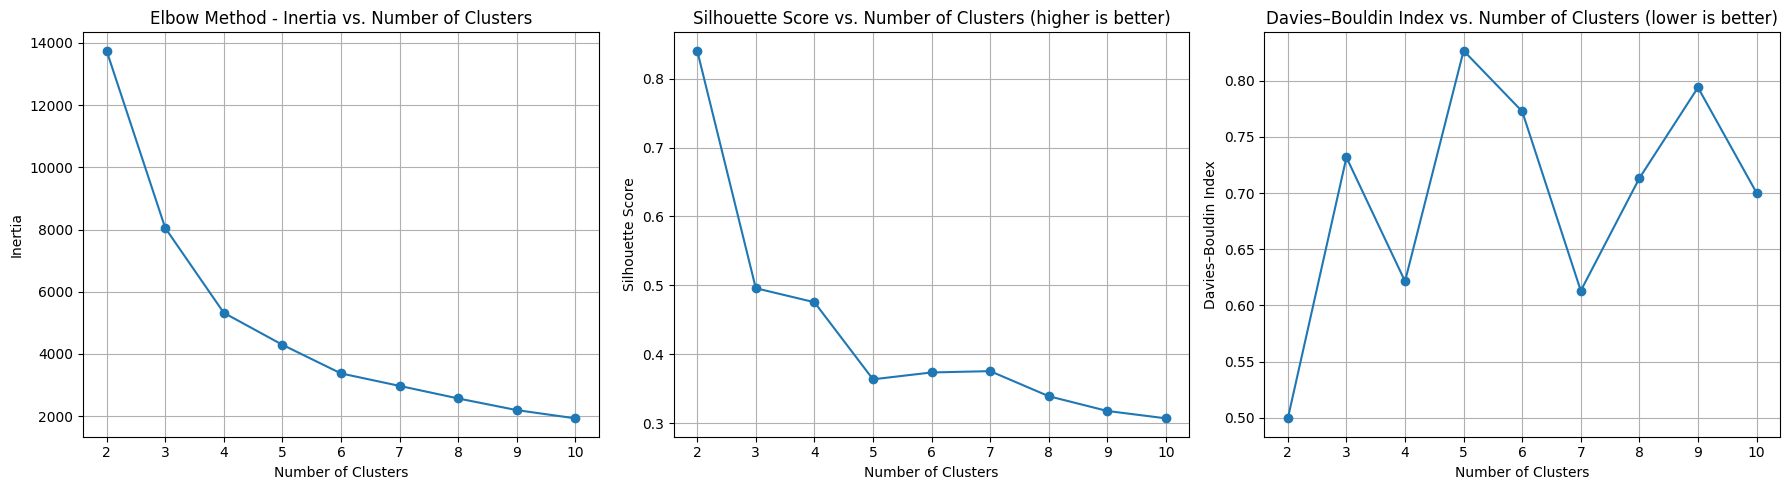

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
#import numpy as np

# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        0
10000011        0
10000014        0
10000016        0

            10000009  10000010  10000011  10000014  10000016  10000017  \
2013-03-01  0.820369  0.631286  0.413468  0.802570  0.479001  0.471542   
2013-03-02  0.815057  0.630666  0.411555  0.794697  0.482937  0.475417   
2013-03-03  0.826865  0.640750  0.412020  0.804343  0.483209  0.475685   
2013-03-04  0.821854  0.640680  0.408772  0.796539  0.479073  0.471613   
2013-03-05  0.822332  0.651794  0.406754  0.790634  0.487162  0.479576   
...              ...       ...       ...       ...       ...       ...   
2013-05-27  0.675458  0.506098  0.346799  0.642700  0.448543  0.441558   
2013-05-28  0.656798  0.500787  0.367039  0.621864  0.433227  0.426481   
2013-05-29  0.726334  0.548464  0.385240  0.658790  0.480265  0.472786   
2013-05-30  0.687732  0.525355  0.360197  0.634045  0.427205  0.420553   
2013-05-31  0.643587  0.501264  0.344221  0.604333  0.401195  0.394948   

            11000009  11000011  11000014  11000016  ...  64000025  66000014  \
2013-03-01  0.938387  1.213916  

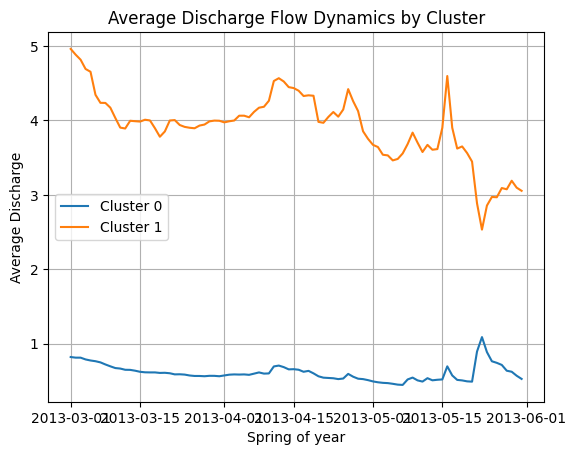

In [5]:
kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure()
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Spring of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)
#print(out_path)

In [7]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2013-03-01  0.820369  0.631286  0.413468  0.802570  0.479001  0.471542   
2013-03-02  0.815057  0.630666  0.411555  0.794697  0.482937  0.475417   
2013-03-03  0.826865  0.640750  0.412020  0.804343  0.483209  0.475685   
2013-03-04  0.821854  0.640680  0.408772  0.796539  0.479073  0.471613   
2013-03-05  0.822332  0.651794  0.406754  0.790634  0.487162  0.479576   
...              ...       ...       ...       ...       ...       ...   
2013-05-27  0.675458  0.506098  0.346799  0.642700  0.448543  0.441558   
2013-05-28  0.656798  0.500787  0.367039  0.621864  0.433227  0.426481   
2013-05-29  0.726334  0.548464  0.385240  0.658790  0.480265  0.472786   
2013-05-30  0.687732  0.525355  0.360197  0.634045  0.427205  0.420553   
2013-05-31  0.643587  0.501264  0.344221  0.604333  0.401195  0.394948   

            11000009  11000011  11000014  11000016  ...  64000025  66000014  \
2013-03-01  0.938387  1.213916  0.557534  1.101067  ...  0.475224  1.543708   
2013-03-02  0.955130  1.181205  0.571857  1.122898  ...  0.437224  1.617457   
2013-03-03  0.966312  1.176416  0.581422  1.137477  ...  0.421387  2.023195   
2013-03-04  0.953723  1.154395  0.570653  1.121062  ...  0.366191  2.007346   
2013-03-05  0.953269  1.136124  0.570264  1.120471  ...  0.359750  1.908107   
...              ...       ...       ...       ...  ...       ...       ...   
2013-05-27  0.565827  0.587171  0.238842  0.615313  ...  1.114049  1.237270   
2013-05-28  0.561736  0.581064  0.235343  0.609979  ...  0.881856  0.875668   
2013-05-29  0.559396  0.575925  0.233341  0.606927  ...  0.747571  0.705631   
2013-05-30  0.557342  0.565943  0.231583  0.604249  ...  0.587784  0.616803   
2013-05-31  0.550504  0.554294  0.225734  0.595333  ...  0.497027  0.533440   

            66000034  67000017  67000018   7000003   8000001   9000001  \
2013-03-01  1.368428  2.056462  1.656923  0.635496  0.722143  1.542311   
2013-03-02  1.463207  2.063915  1.727098  0.631182  0.719560  1.545300   
2013-03-03  1.198203  2.458168  2.516980  0.652331  0.740766  1.519582   
2013-03-04  1.740674  2.129070  2.407110  0.643936  0.739883  1.484517   
2013-03-05  1.454015  1.944486  2.362568  0.645420  0.746174  1.466315   
...              ...       ...       ...       ...       ...       ...   
2013-05-27  4.330718  3.176551  2.399051  0.709732  1.132324  0.948394   
2013-05-28  3.920661  1.776596  1.440058  0.598166  0.980788  0.942498   
2013-05-29  2.677036  1.364156  1.006140  0.581070  1.004136  0.943299   
2013-05-30  1.194296  1.234829  0.985846  0.535727  1.001817  0.944980   
2013-05-31  1.063711  1.025699  0.784558  0.462251  0.863416  0.924984   

             9000015  26000084  
2013-03-01  1.492819  0.723088  
2013-03-02  1.495552  0.713849  
2013-03-03  1.472039  0.705299  
2013-03-04  1.439980  0.721351  
2013-03-05  1.423339  0.676631  
...              ...       ...  
2013-05-27  0.949828  0.309454  
2013-05-28  0.944438  0.423193  
2013-05-29  0.945169  0.375835  
2013-05-30  0.946707  0.385477  
2013-05-31  0.928425  0.362408  

[92 rows x 268 columns]

<Axes: >

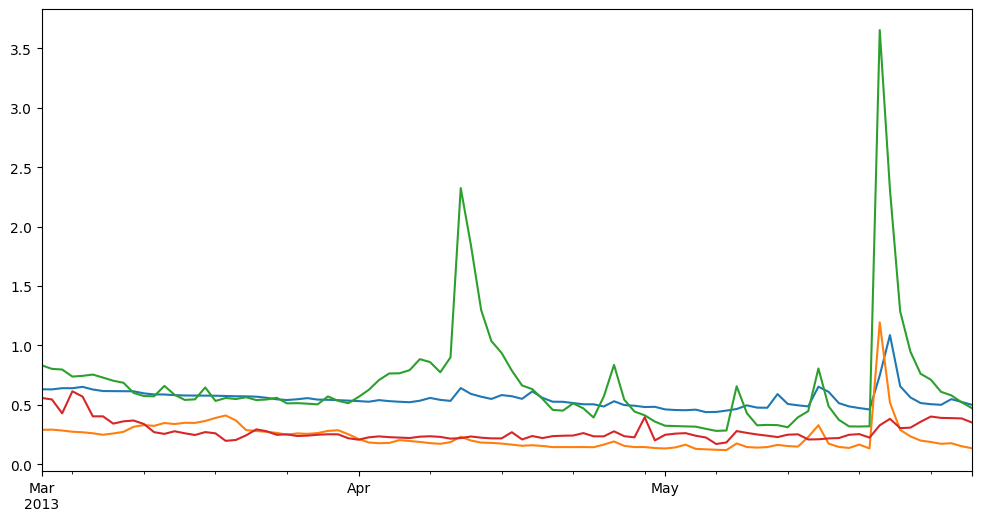

In [8]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

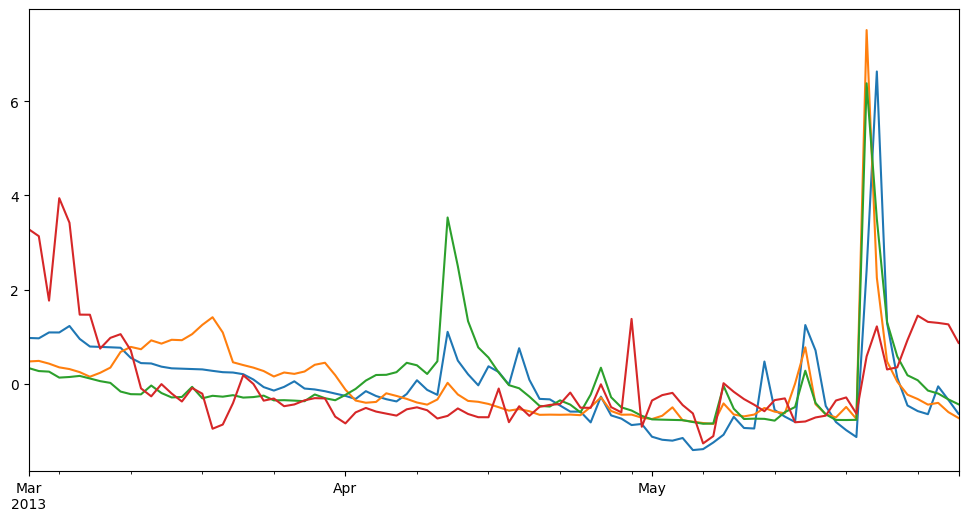

In [9]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

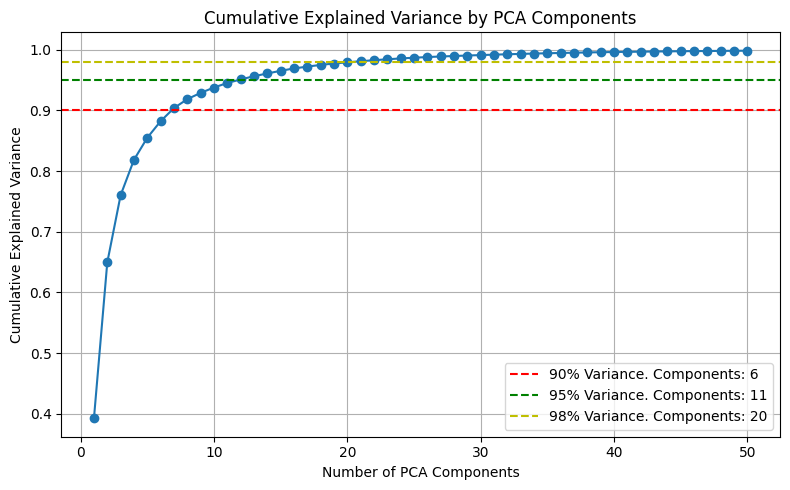

In [10]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 28.23799699,  -4.78132368,  -0.71432516, ...,  -1.69730182,
          0.92929179,   0.18762898],
       [ 27.46305929,  -5.15401461,  -0.80980491, ...,  -1.22429298,
          0.7522635 ,   0.52166718],
       [ 27.03008664,  -5.32375971,  -0.95710309, ...,  -0.40467622,
         -0.13800303,  -0.22892681],
       ...,
       [ -6.35954724,  11.20591116,  -1.66613285, ...,  -0.10581524,
         -0.40955343,   0.13013534],
       [ -9.91774409,   9.2881992 ,  -2.96482001, ...,  -0.41486489,
         -0.66338343,  -0.35440578],
       [-13.06401281,   7.8566023 ,  -3.67480045, ...,  -0.70354206,
         -1.02421793,  -0.38980211]], shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_26904\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


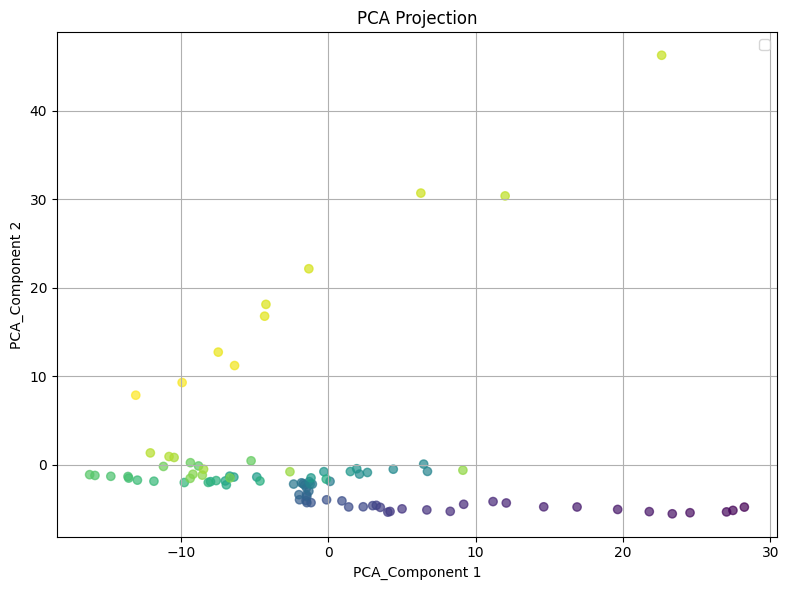

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_26904\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


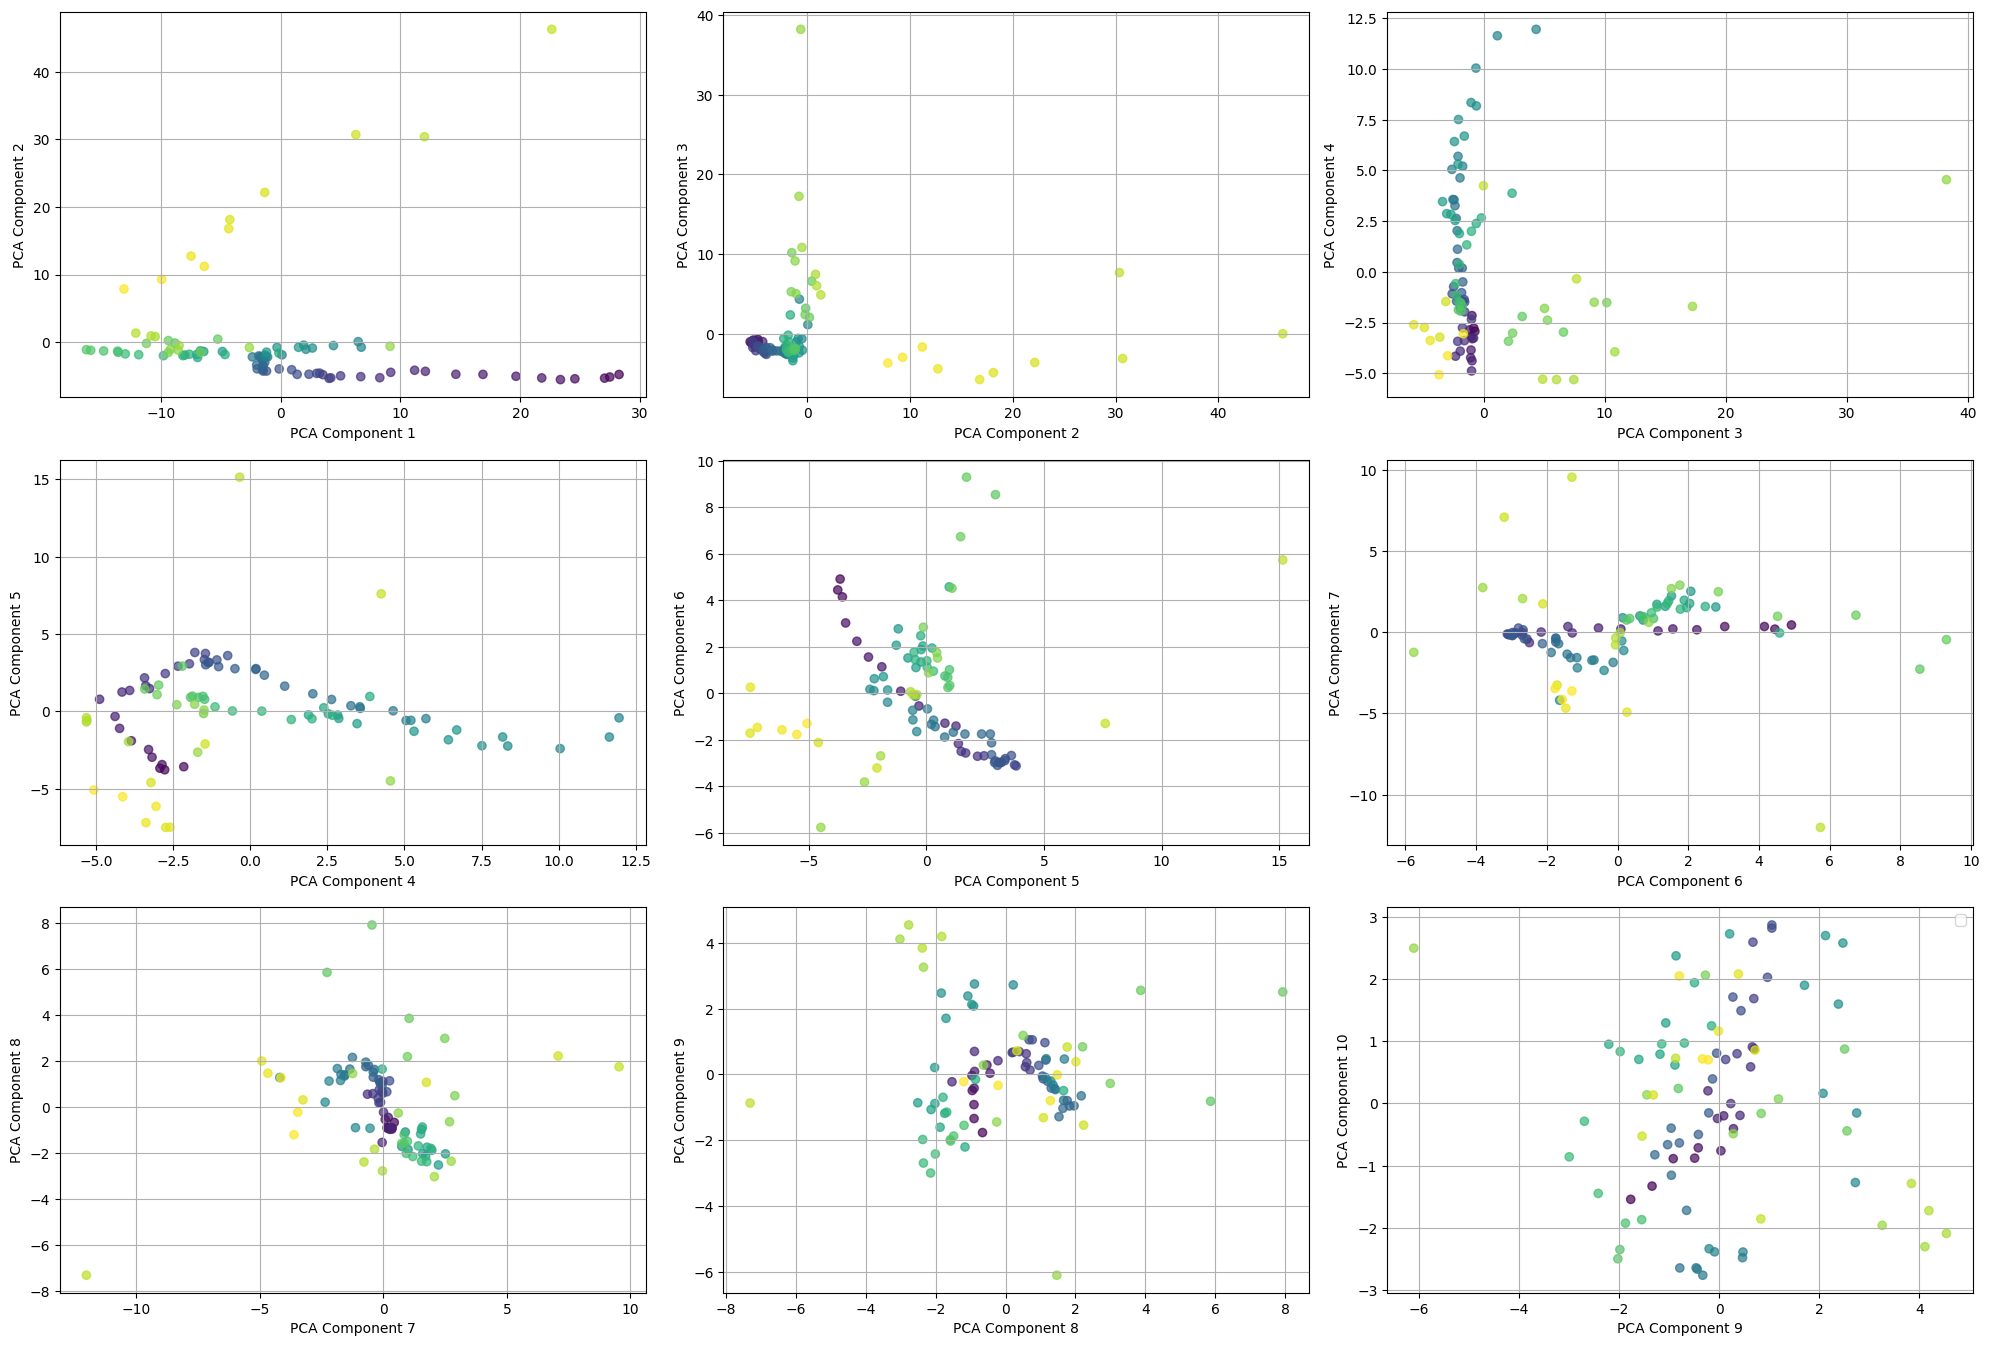

In [13]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [14]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.394
KMeans Davies-Bouldin Index is 0.872


<Axes: xlabel='k'>

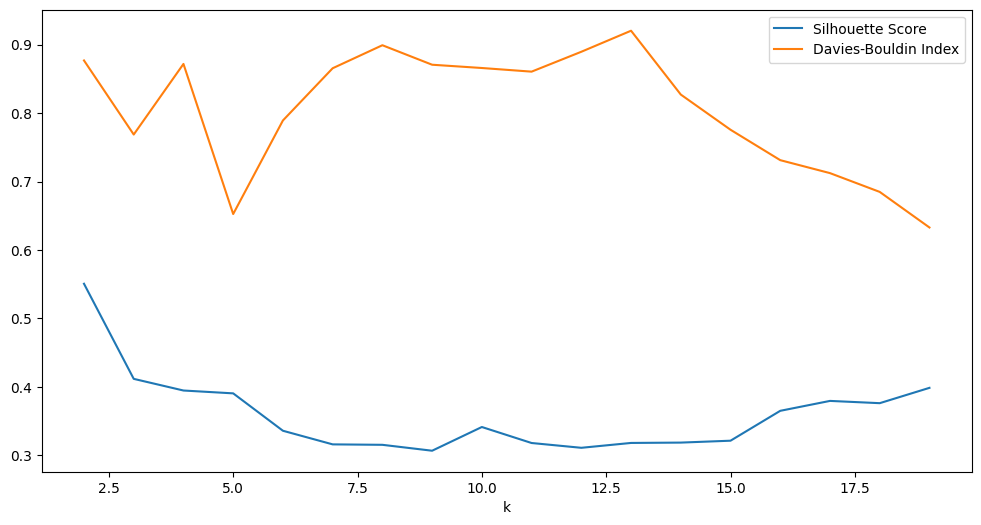

In [15]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         0     92               NaN   
2    1.01            3         1     89               NaN   
3    1.27            3         1     89               NaN   
4    1.52            3         3     82         -0.249190   
5    1.78            3         4     79         -0.249300   
6    2.03            3         6     70         -0.178000   
7    2.29            3         5     63         -0.100396   
8    2.54            3         7     54         -0.024944   
9    2.80            3         7     45          0.070349   
10   3.05            3         6     42          0.119971   
11   3.31            3         5     38          0.124493   
12   3.56            3         7     32          0.132396   
13   3.82            3         6     30          0.159366   
14   4.07            3         6     28          0.182497   
15   4.33            3         6     28          0.182497   
16   4.58            3         5     27          0.219362   
17   4.84            3         5     24          0.231967   
18   5.09            3         4     23          0.186864   
19   5.35            3         5     20          0.192853   
20   5.60            3         5     20          0.192853   
21   5.86            3         5     20          0.192853   
22   6.11            3         6     16          0.209338   
23   6.37            3         5     15          0.114463   
24   6.62            3         5     15          0.114463   
25   6.88            3         4     12          0.098472   
26   7.13            3         4     11          0.121967   
27   7.39            3         4     11          0.121967   
28   7.64            3         4      9          0.134908   
29   7.90            3         4      8          0.140085   
30   8.15            3         4      8          0.140085   
31   8.41            3         3      8          0.172716   
32   8.66            3         3      6          0.176647   
33   8.92            3         2      6          0.292291   
34   9.17            3         2      6          0.292291   
35   9.43            3         2      5          0.296451   
36   9.68            3         2      5          0.296451   
37   9.94            3         2      5          0.296451   
38  10.19            3         2      4          0.322930   
39  10.45            3         2      4          0.322930   
40  10.70            3         2      4          0.322930   
41  10.96            3         2      4          0.322930   
42  11.21            3         2      4          0.322930   
43  11.47            3         2      4          0.322930   
44  11.72            3         2      4          0.322930   
45  11.98            3         2      4          0.322930   
46  12.23            3         2      4          0.322930   
47  12.49            3         2      4          0.322930   
48  12.74            3         2      4          0.322930   
49  13.00            3         2      4          0.322930   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4               2.186323  
5               1.872557  
6               1.673793  
7               1.846360  
8               1.736491  
9               1.469783  
10              1.583960  
11              1.613354  
12              1.480352  
13              1.570357  
14              1.568057  
15              1.568057  
16              1.581918  
17              1.497842  
18              1.627604  
19              1.633574  
20              1.633574  
21              1.633574  
22              1.604094  
23              1.720417  
24              1.720417  
25              1.649900  
26              1.585829  
27              1.585829  
28              1.629737  
29              1.546509  
30              1.546509  
31              1.595404  
32 

<Axes: xlabel='eps'>

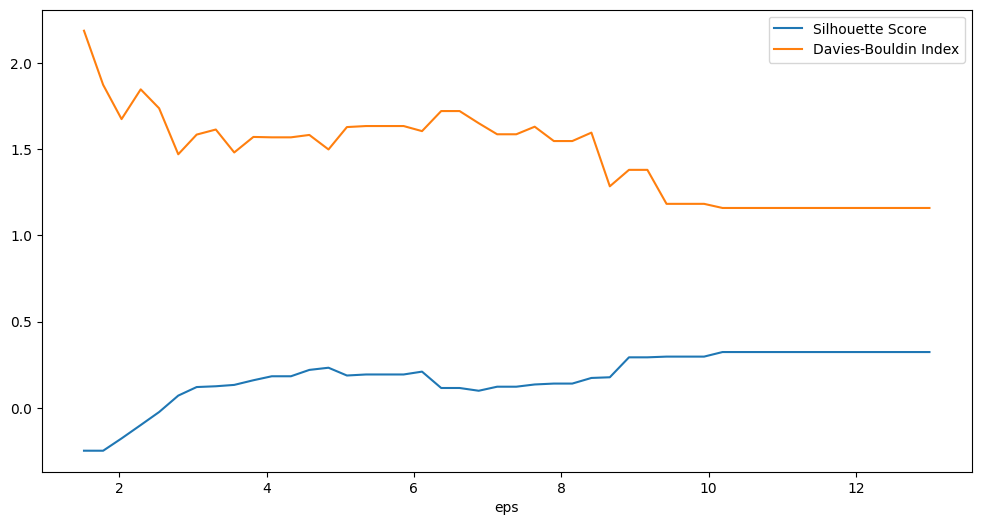

In [16]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

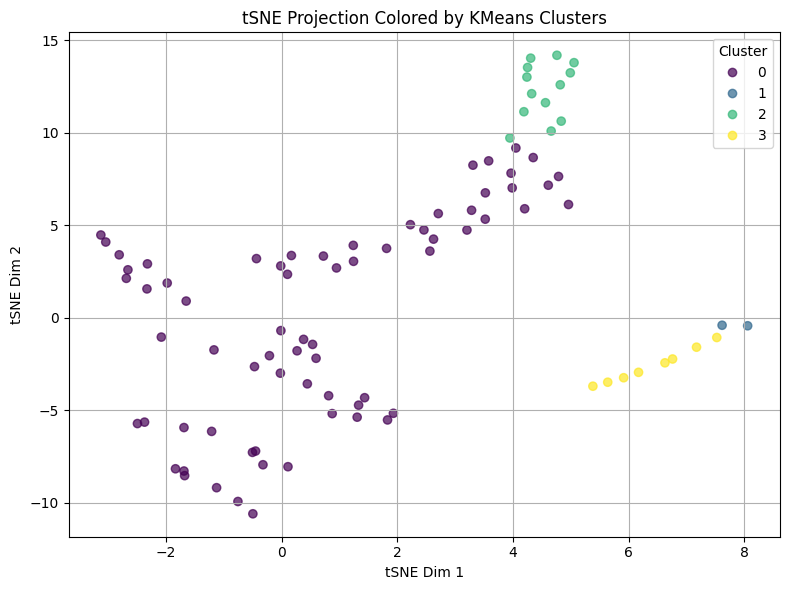

In [17]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         6    256          0.988130   
1    0.05            2         6    256          0.988130   
2    0.06            2         6    256          0.988130   
3    0.06            2         6    256          0.988130   
4    0.07            2         6    256          0.988130   
..    ...          ...       ...    ...               ...   
195  0.98            2        20     64         -0.196398   
196  0.99            2        20     63         -0.197232   
197  0.99            2        20     63         -0.197232   
198  1.00            2        20     63         -0.197232   
199  1.00            2        20     63         -0.197232   

     Davies-Bouldin Index  
0                0.013501  
1                0.013501  
2                0.013501  
3                0.013501  
4                0.013501  
..                    ...  
195              0.880048  
196              0.879979  
197              0.879979  
198              0.879979  
199              0.879979  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

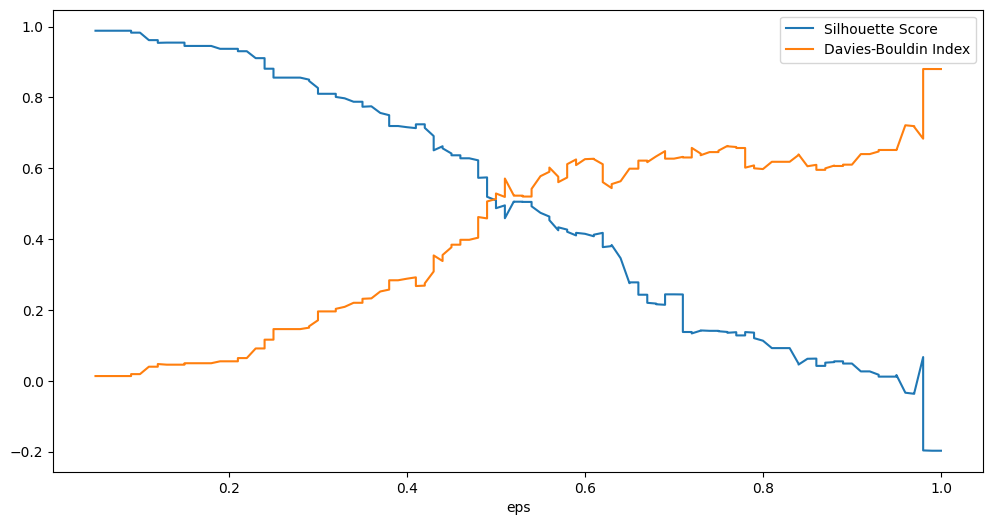

In [18]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Summer (2)

In [19]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [20]:
#Start with spring and work our way down to winter
season = 2
season_year = 2013
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2013-06-01 to 2013-08-31
Columns: 262 entries, 10000009 to 26000084
dtypes: float64(262)
memory usage: 189.0 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2013-06-01  0.622279  0.481547  0.332489  0.583966  0.387636  0.381600   
2013-06-02  0.606531  0.471191  0.329796  0.566985  0.371912  0.366121   
2013-06-03  0.588647  0.460993  0.331714  0.559223  0.356210  0.350663   
2013-06-04  0.575704  0.451119  0.336090  0.546678  0.345559  0.340178   
2013-06-05  0.569239  0.444375  0.329522  0.536311  0.338167  0.332901   
...              ...       ...       ...       ...       ...       ...   
2013-08-27  0.539395  0.401172  0.139161  0.578583  0.304033  0.299299   
2013-08-28  0.543001  0.400606  0.138510  0.566589  0.304761  0.300015   
2013-08-29  0.545743  0.409826  0.139075  0.563890  0.307811  0.303017   
2013-08-30  0.562373  0.446605  0.144596  0.570942  0.332927  0.327742   
2013-08-31  0.596272  0.465602  0.149193  0.577921  0.331859  0.326692   

            11000009  11000011  11000014  11000016  ...  64000025  66000014  \
2013-06-01  0.539692  0.539084  

          2013-06-01  2013-06-02  2013-06-03  2013-06-04  2013-06-05  \
10000009    0.165096    0.206069    0.233307    0.242224    0.262048   
10000010   -0.153308   -0.110979   -0.070655   -0.055482   -0.035899   
10000011   -0.490551   -0.442210   -0.378483   -0.330353   -0.309957   
10000014    0.078413    0.113428    0.163243    0.172863    0.183475   
10000016   -0.365782   -0.343549   -0.320156   -0.307726   -0.289327   
...              ...         ...         ...         ...         ...   
7000003    -0.295409   -0.319471   -0.344714   -0.365472   -0.367738   
8000001     0.521876    0.441798    0.354146    0.268595    0.217170   
9000001     0.814795    0.874845    0.936140    0.979643    0.997794   
9000015     0.825596    0.889528    0.952740    0.996201    1.015704   
26000084   -0.479743   -0.503720   -0.525867   -0.514572   -0.567613   

          2013-06-06  2013-06-07  2013-06-08  2013-06-09  2013-06-10  ...  \
10000009    0.275329    0.283953    0.298918    0.300582  

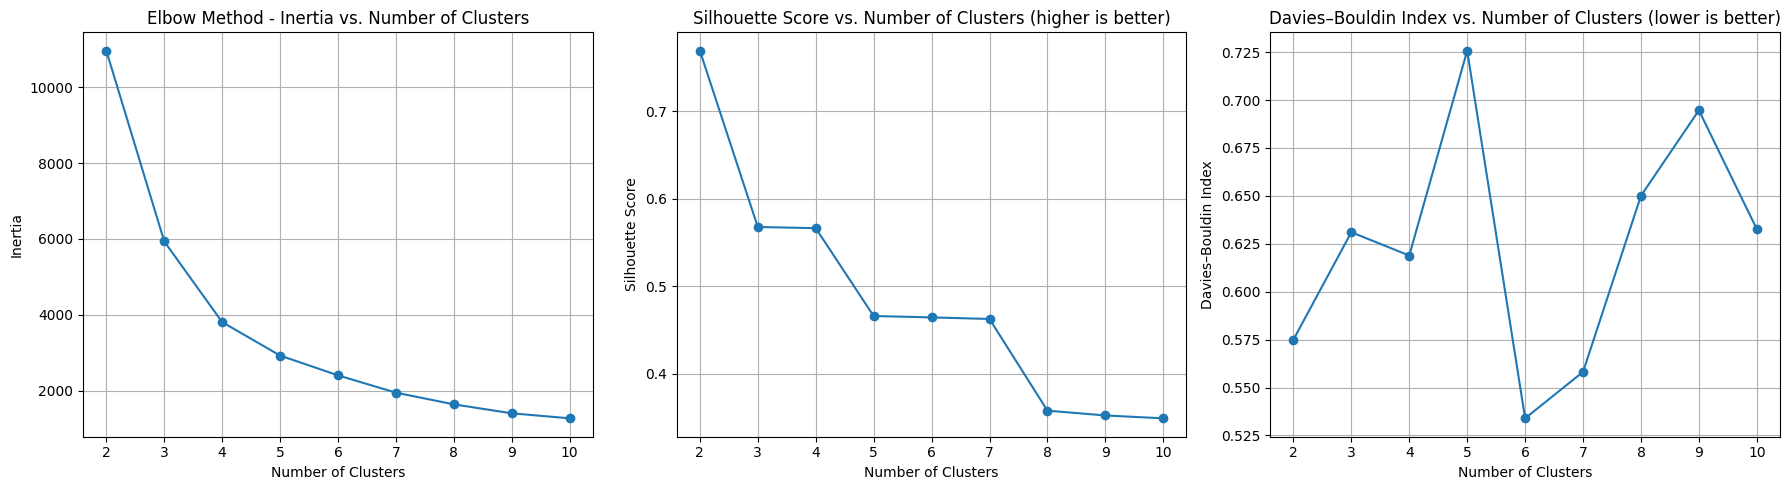

In [21]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        2
10000010        2
10000011        0
10000014        2
10000016        0

            10000009  10000010  10000011  10000014  10000016  10000017  \
2013-06-01  0.622279  0.481547  0.332489  0.583966  0.387636  0.381600   
2013-06-02  0.606531  0.471191  0.329796  0.566985  0.371912  0.366121   
2013-06-03  0.588647  0.460993  0.331714  0.559223  0.356210  0.350663   
2013-06-04  0.575704  0.451119  0.336090  0.546678  0.345559  0.340178   
2013-06-05  0.569239  0.444375  0.329522  0.536311  0.338167  0.332901   
...              ...       ...       ...       ...       ...       ...   
2013-08-27  0.539395  0.401172  0.139161  0.578583  0.304033  0.299299   
2013-08-28  0.543001  0.400606  0.138510  0.566589  0.304761  0.300015   
2013-08-29  0.545743  0.409826  0.139075  0.563890  0.307811  0.303017   
2013-08-30  0.562373  0.446605  0.144596  0.570942  0.332927  0.327742   
2013-08-31  0.596272  0.465602  0.149193  0.577921  0.331859  0.326692   

            11000009  11000011  11000014  11000016  ...  64000025  66000014  \
2013-06-01  0.539692  0.539084  

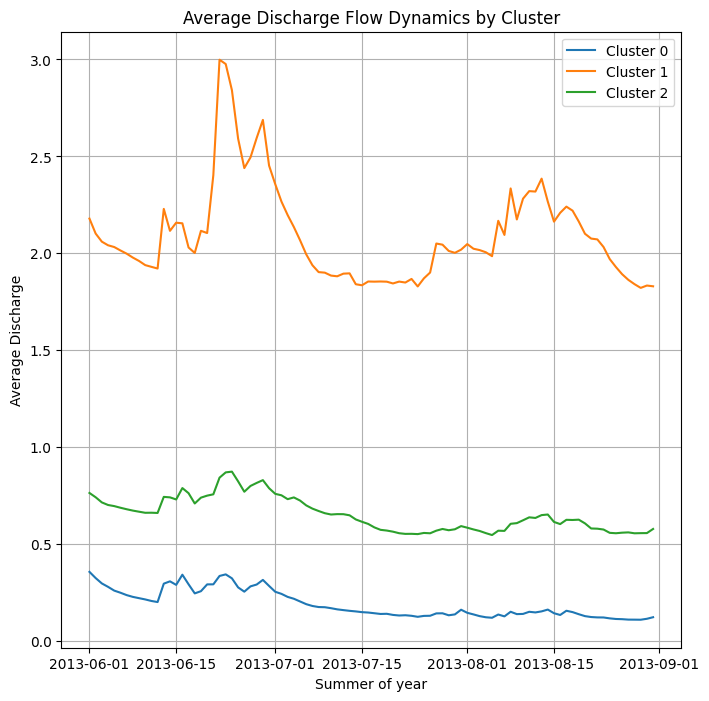

In [22]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Summer of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [24]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2013-06-01  0.622279  0.481547  0.332489  0.583966  0.387636  0.381600   
2013-06-02  0.606531  0.471191  0.329796  0.566985  0.371912  0.366121   
2013-06-03  0.588647  0.460993  0.331714  0.559223  0.356210  0.350663   
2013-06-04  0.575704  0.451119  0.336090  0.546678  0.345559  0.340178   
2013-06-05  0.569239  0.444375  0.329522  0.536311  0.338167  0.332901   
...              ...       ...       ...       ...       ...       ...   
2013-08-27  0.539395  0.401172  0.139161  0.578583  0.304033  0.299299   
2013-08-28  0.543001  0.400606  0.138510  0.566589  0.304761  0.300015   
2013-08-29  0.545743  0.409826  0.139075  0.563890  0.307811  0.303017   
2013-08-30  0.562373  0.446605  0.144596  0.570942  0.332927  0.327742   
2013-08-31  0.596272  0.465602  0.149193  0.577921  0.331859  0.326692   

            11000009  11000011  11000014  11000016  ...  64000025  66000014  \
2013-06-01  0.539692  0.539084  0.216485  0.581236  ...  0.415373  0.472878   
2013-06-02  0.535041  0.525982  0.212507  0.575172  ...  0.343859  0.434134   
2013-06-03  0.524119  0.517734  0.203164  0.560932  ...  0.282736  0.378278   
2013-06-04  0.513518  0.497804  0.194096  0.547110  ...  0.245862  0.326766   
2013-06-05  0.508751  0.482254  0.190018  0.540894  ...  0.212679  0.284495   
...              ...       ...       ...       ...  ...       ...       ...   
2013-08-27  0.431800  0.329645  0.124193  0.440563  ...  0.007529  0.040516   
2013-08-28  0.428626  0.325335  0.121479  0.436426  ...  0.007404  0.042563   
2013-08-29  0.427094  0.319531  0.120168  0.434428  ...  0.007086  0.041899   
2013-08-30  0.439775  0.321053  0.131016  0.450962  ...  0.007011  0.041587   
2013-08-31  0.437138  0.319811  0.128760  0.447524  ...  0.009265  0.041802   

            66000034  67000017  67000018   7000003   8000001   9000001  \
2013-06-01  0.978322  0.865881  0.658828  0.418740  0.779972  0.909439   
2013-06-02  0.955604  0.793169  0.607741  0.382191  0.707158  0.892015   
2013-06-03  0.877795  0.717676  0.516206  0.345896  0.639396  0.883816   
2013-06-04  0.782221  0.691429  0.391436  0.321393  0.586740  0.884302   
2013-06-05  0.683260  0.535444  0.325053  0.305306  0.550431  0.877578   
...              ...       ...       ...       ...       ...       ...   
2013-08-27  0.156142  0.022424  0.008408  0.154949  0.232638  0.525009   
2013-08-28  0.151369  0.023368  0.009727  0.157457  0.237128  0.480892   
2013-08-29  0.145151  0.023574  0.009676  0.158809  0.240317  0.474543   
2013-08-30  0.144516  0.022602  0.009448  0.161105  0.244505  0.471184   
2013-08-31  0.138686  0.022649  0.009979  0.166365  0.248923  0.470619   

             9000015  26000084  
2013-06-01  0.914213  0.337267  
2013-06-02  0.898283  0.303539  
2013-06-03  0.890787  0.269817  
2013-06-04  0.891232  0.258997  
2013-06-05  0.885084  0.221542  
...              ...       ...  
2013-08-27  0.562747  0.086561  
2013-08-28  0.522412  0.083197  
2013-08-29  0.516607  0.079984  
2013-08-30  0.513536  0.079929  
2013-08-31  0.513020  0.085659  

[92 rows x 262 columns]

<Axes: >

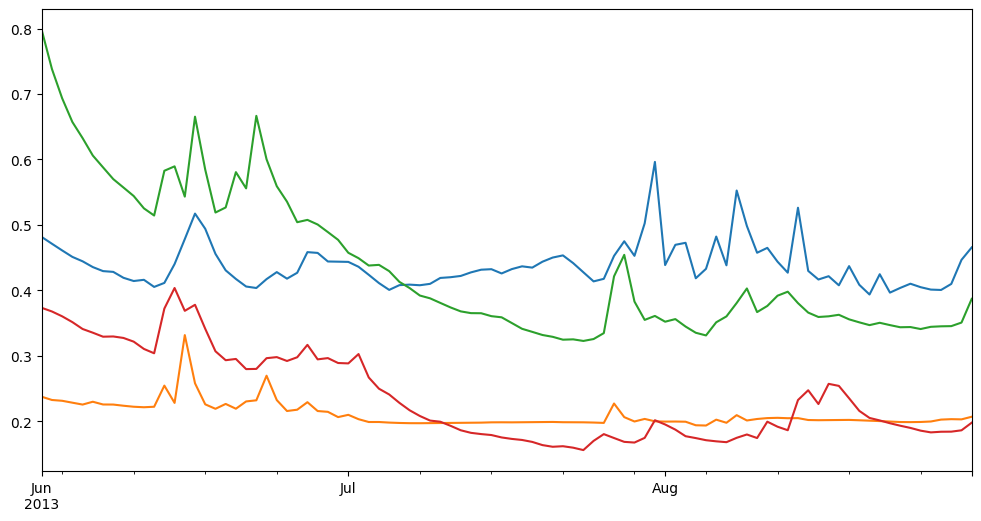

In [25]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

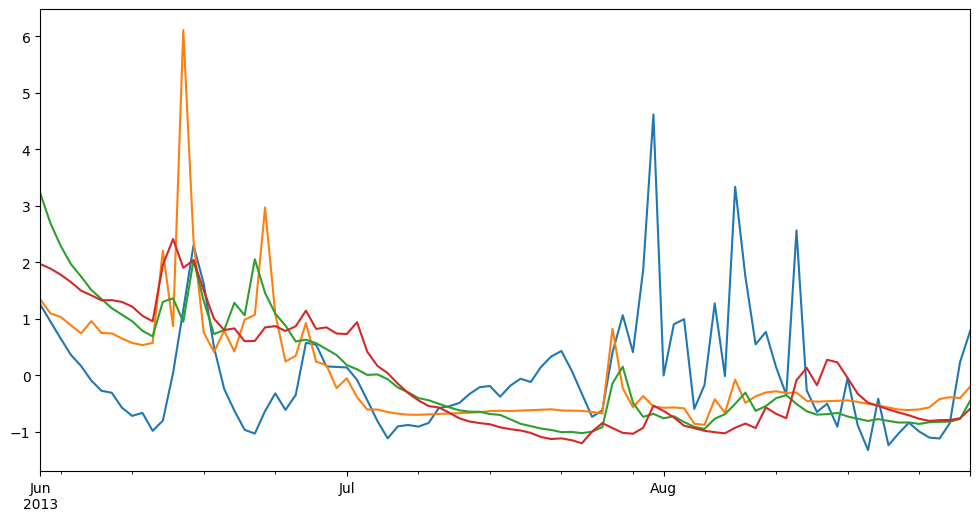

In [26]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

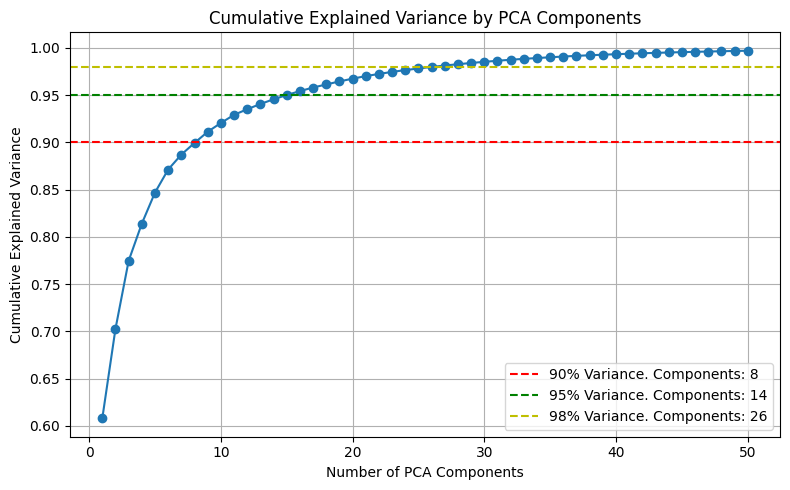

In [27]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 27.95723971, -13.59183313,  -3.56189542, ...,  -0.09016165,
          1.08382797,  -0.058066  ],
       [ 22.9979936 , -12.30588494,  -3.90358496, ...,  -0.39267212,
          0.12649662,   0.08219209],
       [ 18.53772656, -11.3409157 ,  -3.74989599, ...,  -0.3358472 ,
         -0.64686847,   0.35558256],
       ...,
       [-14.419214  ,  -1.17621553,   2.30045824, ...,   0.22235112,
          0.14325745,  -0.05757061],
       [-13.410339  ,  -1.2546163 ,   3.50135321, ...,   0.46292367,
          0.20503736,   0.07935081],
       [-12.04872972,  -1.22299174,   4.72196862, ...,   1.37904627,
         -0.42507368,  -0.72205343]], shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_26904\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


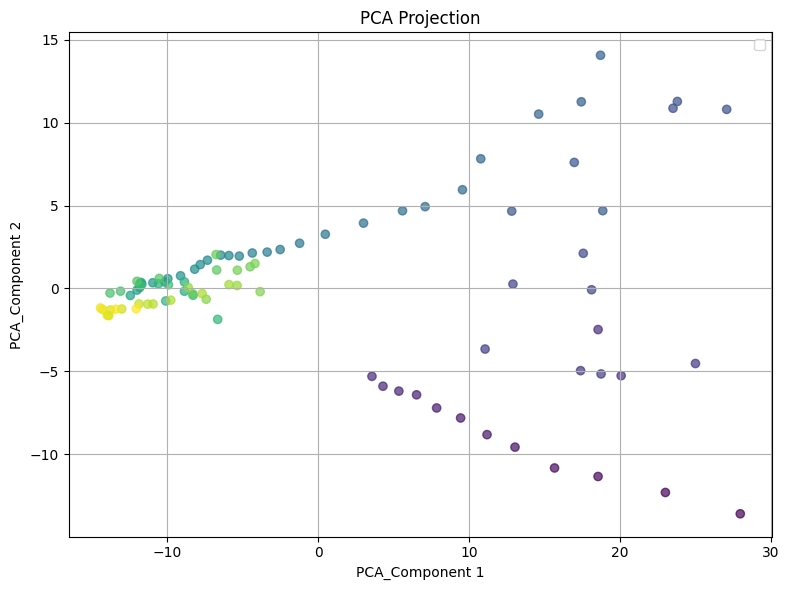

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_26904\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


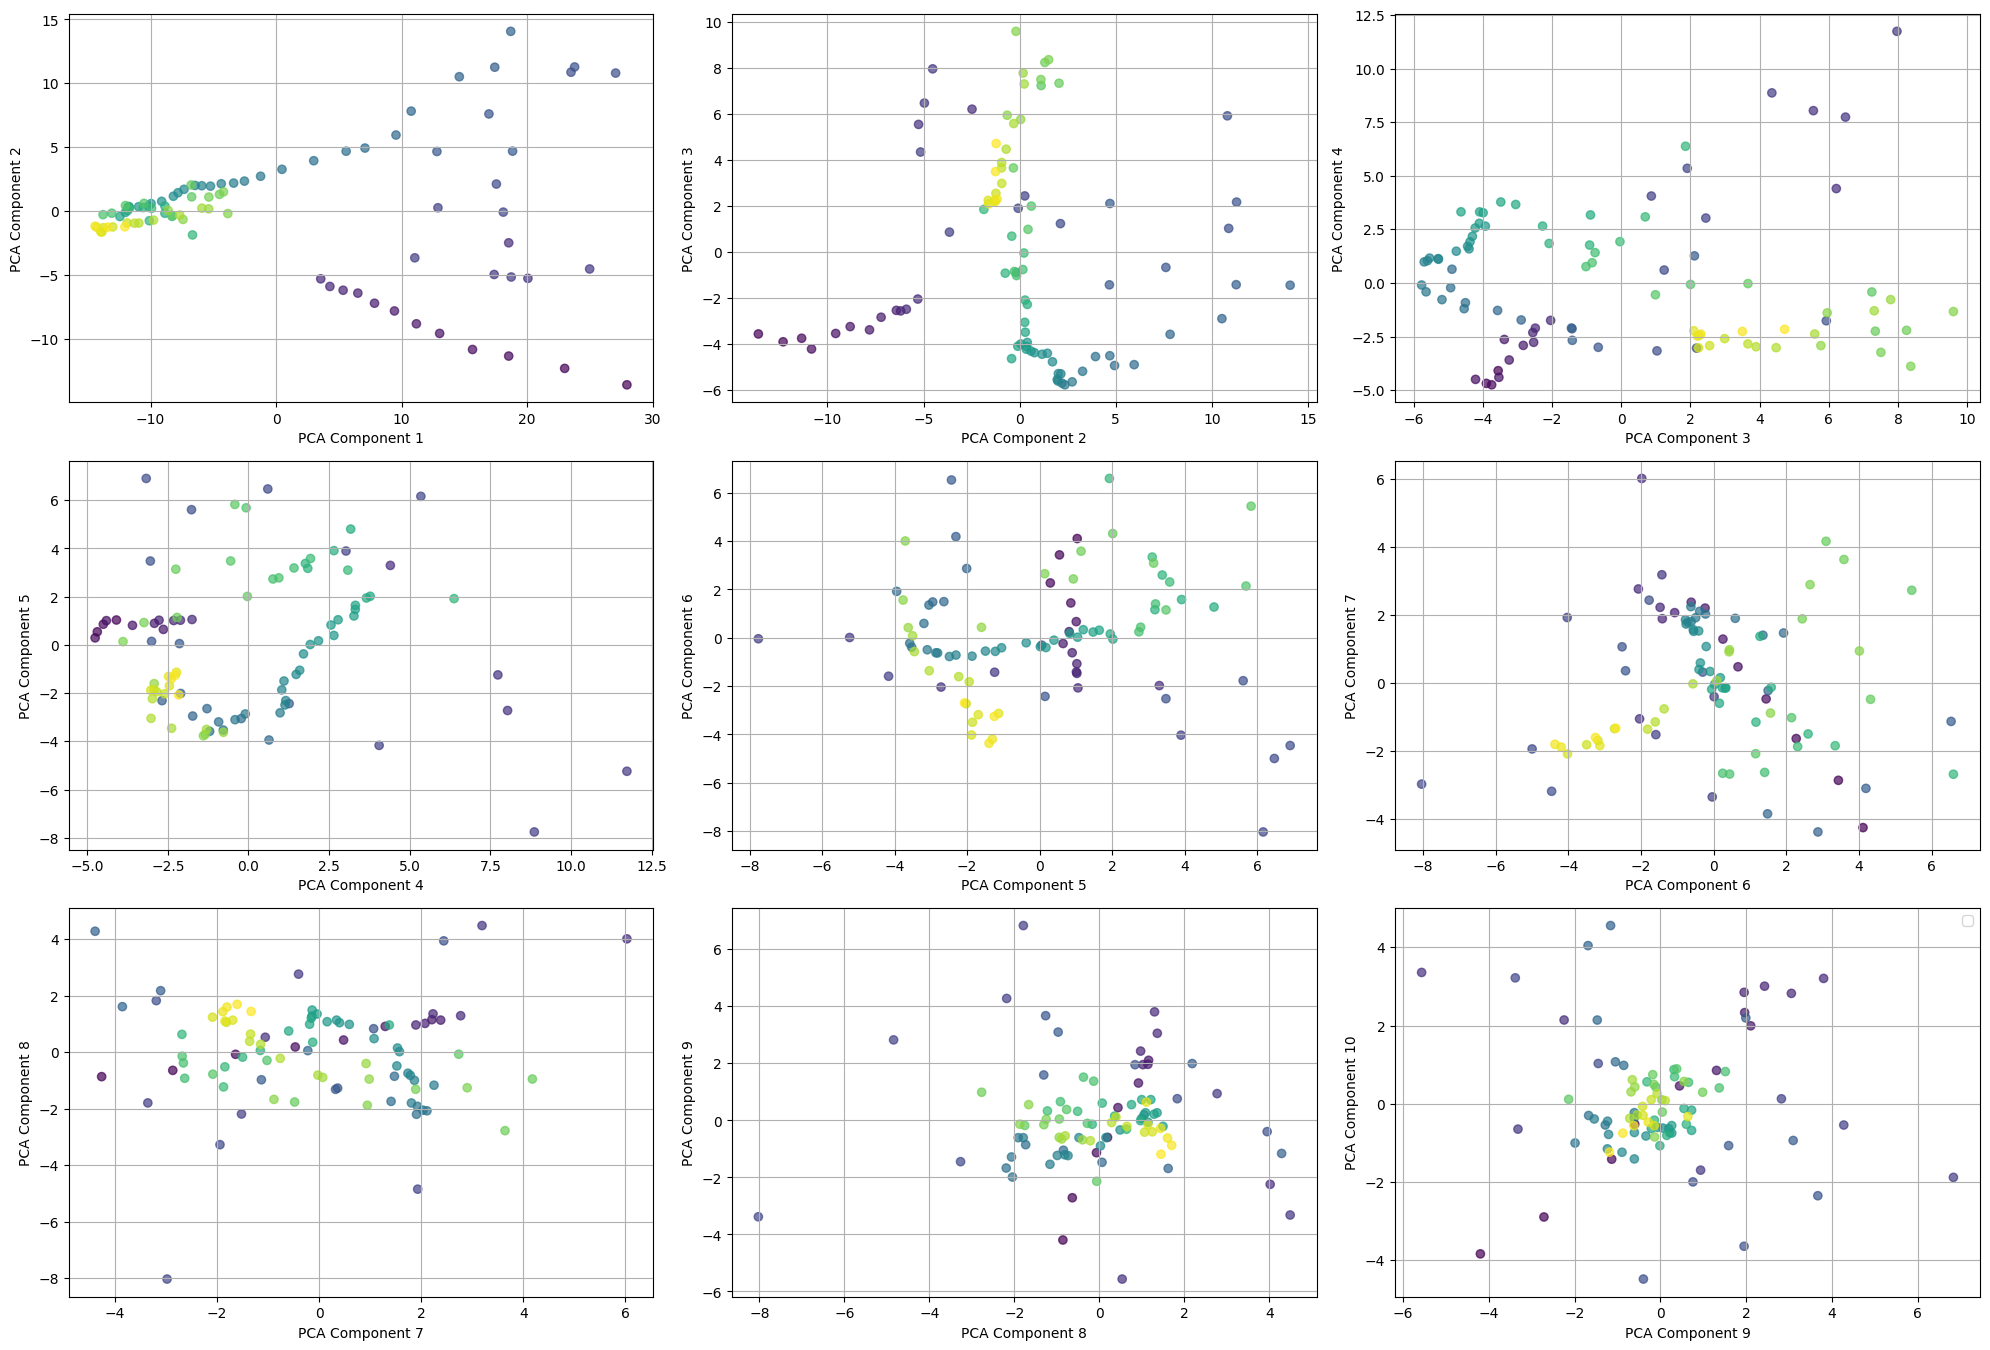

In [30]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [31]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.285
KMeans Davies-Bouldin Index is 1.465


<Axes: xlabel='k'>

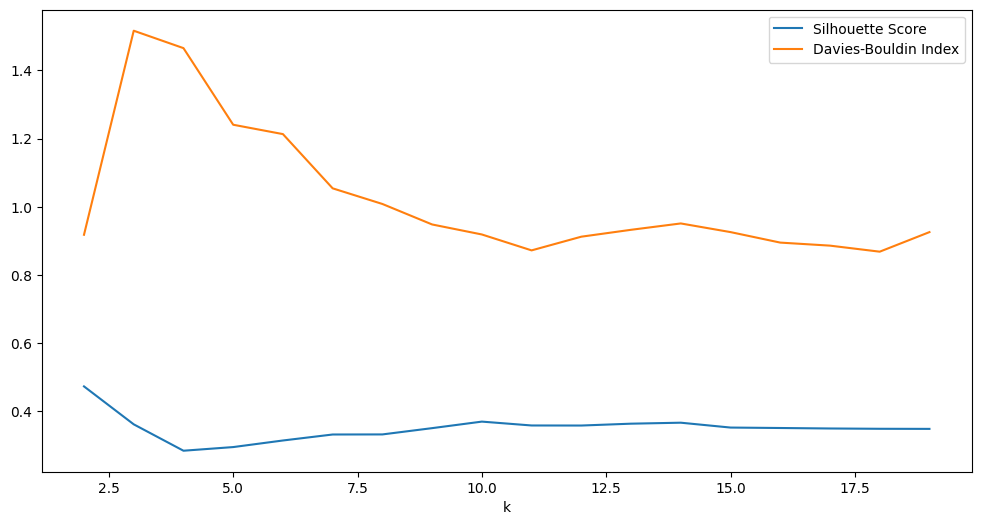

In [32]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         0     92               NaN   
2    1.01            3         0     92               NaN   
3    1.27            3         2     85         -0.224626   
4    1.52            3         2     82         -0.174637   
5    1.78            3         4     72         -0.125574   
6    2.03            3         4     69         -0.085843   
7    2.29            3         4     66         -0.043673   
8    2.54            3         3     61         -0.033433   
9    2.80            3         3     57          0.002016   
10   3.05            3         3     53          0.053960   
11   3.31            3         4     48          0.048677   
12   3.56            3         4     44          0.083249   
13   3.82            3         4     42          0.100957   
14   4.07            3         5     34          0.087840   
15   4.33            3         5     34          0.087840   
16   4.58            3         4     30          0.187343   
17   4.84            3         4     27          0.193580   
18   5.09            3         4     27          0.193580   
19   5.35            3         4     27          0.193580   
20   5.60            3         4     25          0.210726   
21   5.86            3         4     25          0.210726   
22   6.11            3         4     24          0.219296   
23   6.37            3         4     24          0.219296   
24   6.62            3         4     22          0.222133   
25   6.88            3         4     22          0.222133   
26   7.13            3         4     20          0.212468   
27   7.39            3         3     17          0.206974   
28   7.64            3         3     17          0.206974   
29   7.90            3         3     16          0.213277   
30   8.15            3         3     14          0.194397   
31   8.41            3         3     13          0.204771   
32   8.66            3         2     13          0.358285   
33   8.92            3         2     13          0.358285   
34   9.17            3         2     13          0.358285   
35   9.43            3         2     13          0.358285   
36   9.68            3         2     13          0.358285   
37   9.94            3         2     10          0.319738   
38  10.19            3         2     10          0.319738   
39  10.45            3         2     10          0.319738   
40  10.70            3         2     10          0.319738   
41  10.96            3         2     10          0.319738   
42  11.21            3         2     10          0.319738   
43  11.47            3         3      7          0.314549   
44  11.72            3         3      7          0.314549   
45  11.98            3         3      7          0.314549   
46  12.23            3         4      4          0.310693   
47  12.49            3         4      4          0.310693   
48  12.74            3         2      4          0.259411   
49  13.00            3         1      4               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3               1.558764  
4               1.496058  
5               1.252890  
6               1.242826  
7               1.196192  
8               1.486666  
9               1.522410  
10              1.602908  
11              1.428550  
12              1.431241  
13              1.411021  
14              1.359576  
15              1.359576  
16              1.396000  
17              1.344033  
18              1.344033  
19              1.344033  
20              1.336149  
21              1.336149  
22              1.331272  
23              1.331272  
24              1.327592  
25              1.327592  
26              1.331246  
27              1.555145  
28              1.555145  
29              1.505686  
30              1.517597  
31              1.470147  
32 

<Axes: xlabel='eps'>

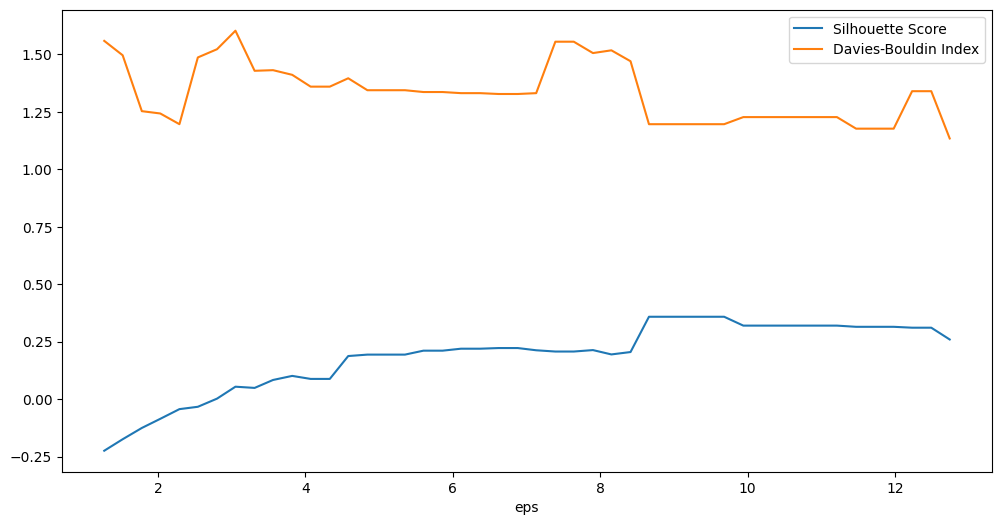

In [33]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

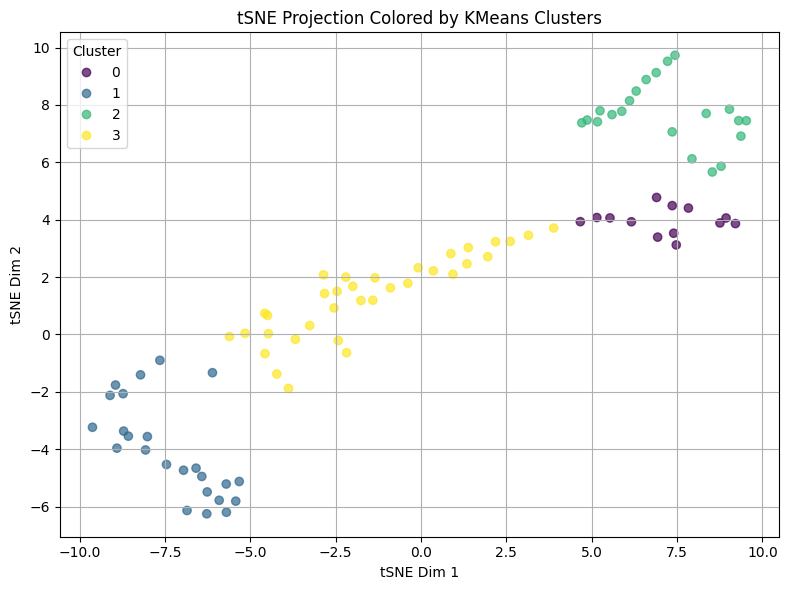

In [34]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         6    250          0.990446   
1    0.05            2         6    250          0.990446   
2    0.06            2         6    250          0.990446   
3    0.06            2         6    250          0.990446   
4    0.07            2         6    250          0.990446   
..    ...          ...       ...    ...               ...   
195  0.98            2        19     41         -0.075686   
196  0.99            2        19     40         -0.075488   
197  0.99            2        17     40         -0.088138   
198  1.00            2        17     40         -0.088138   
199  1.00            2        17     40         -0.088138   

     Davies-Bouldin Index  
0                0.012509  
1                0.012509  
2                0.012509  
3                0.012509  
4                0.012509  
..                    ...  
195              0.775534  
196              0.787027  
197              0.786819  
198              0.786819  
199              0.786819  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

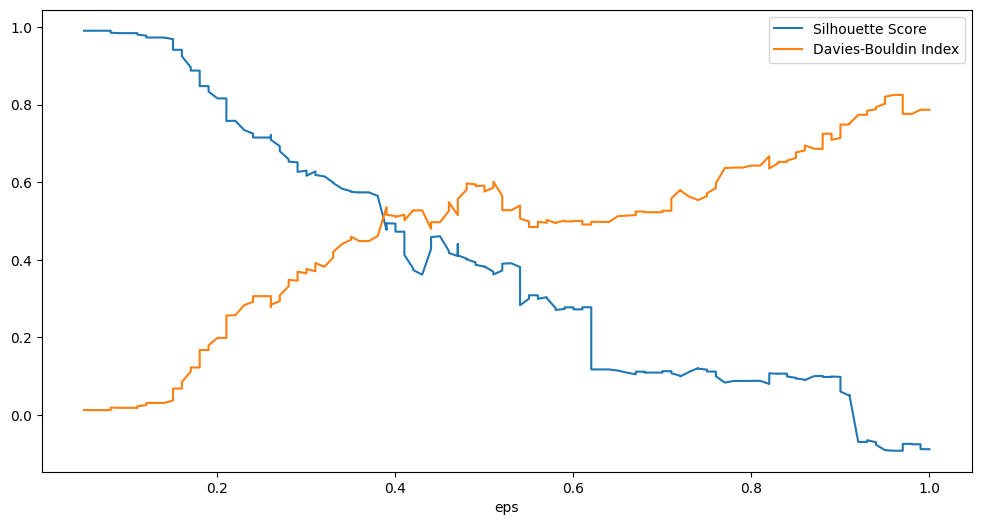

In [35]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Fall (3)

In [36]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [37]:
#Start with spring and work our way down to winter
season = 3
season_year = 2013
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2013-09-01 to 2013-11-30
Columns: 267 entries, 10000009 to 26000084
dtypes: float64(267)
memory usage: 190.5 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2013-09-01  0.598750  0.440540  0.147383  0.580998  0.327352  0.322254   
2013-09-02  0.625137  0.443261  0.172055  0.599211  0.347024  0.341621   
2013-09-03  0.656073  0.415104  0.160439  0.601029  0.325870  0.320796   
2013-09-04  0.635905  0.393460  0.161294  0.596390  0.310181  0.305351   
2013-09-05  0.618857  0.377742  0.156876  0.585250  0.308413  0.303611   
...              ...       ...       ...       ...       ...       ...   
2013-11-26  0.796163  0.475860  0.273634  0.706131  0.377804  0.371921   
2013-11-27  0.811244  0.479125  0.274413  0.717333  0.398051  0.391853   
2013-11-28  0.845618  0.495707  0.274675  0.733358  0.399063  0.392849   
2013-11-29  0.851667  0.548724  0.317571  0.776522  0.469276  0.461969   
2013-11-30  0.930999  0.700560  0.373947  0.916445  0.519676  0.511584   

            11000009  11000011  11000014  11000016  ...  64000025  66000014  \
2013-09-01  0.435774  0.320112  

          2013-09-01  2013-09-02  2013-09-03  2013-09-04  2013-09-05  \
10000009    0.669283    0.537133    0.529868    0.625537    0.641670   
10000010    0.281287    0.136477    0.036113    0.071781    0.070978   
10000011   -0.437658   -0.460962   -0.485705   -0.458497   -0.451788   
10000014    0.625747    0.480019    0.417080    0.535283    0.562127   
10000016    0.003701   -0.075522   -0.146730   -0.118432   -0.093116   
...              ...         ...         ...         ...         ...   
7000003    -0.390559   -0.404390   -0.418178   -0.396058   -0.385693   
8000001    -0.175672   -0.247420   -0.238490   -0.193900   -0.166327   
9000001     0.342379    0.190172    0.153982    0.254534    0.291166   
9000015     0.447451    0.284141    0.240511    0.350822    0.391494   
26000084   -0.583115   -0.574038   -0.531858   -0.489445   -0.465667   

          2013-09-06  2013-09-07  2013-09-08  2013-09-09  2013-09-10  ...  \
10000009    0.651145    0.609823    0.574319    0.405578  

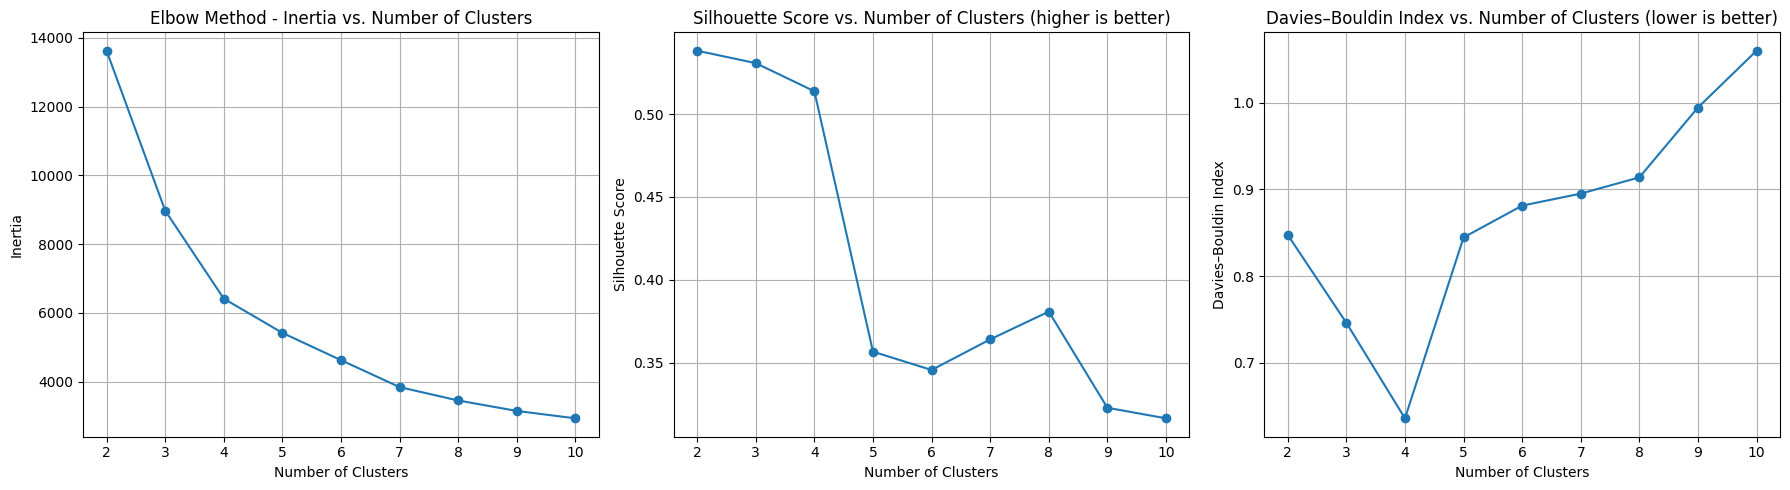

In [38]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        1
10000010        0
10000011        0
10000014        1
10000016        0

            10000009  10000010  10000011  10000014  10000016  10000017  \
2013-09-01  0.598750  0.440540  0.147383  0.580998  0.327352  0.322254   
2013-09-02  0.625137  0.443261  0.172055  0.599211  0.347024  0.341621   
2013-09-03  0.656073  0.415104  0.160439  0.601029  0.325870  0.320796   
2013-09-04  0.635905  0.393460  0.161294  0.596390  0.310181  0.305351   
2013-09-05  0.618857  0.377742  0.156876  0.585250  0.308413  0.303611   
...              ...       ...       ...       ...       ...       ...   
2013-11-26  0.796163  0.475860  0.273634  0.706131  0.377804  0.371921   
2013-11-27  0.811244  0.479125  0.274413  0.717333  0.398051  0.391853   
2013-11-28  0.845618  0.495707  0.274675  0.733358  0.399063  0.392849   
2013-11-29  0.851667  0.548724  0.317571  0.776522  0.469276  0.461969   
2013-11-30  0.930999  0.700560  0.373947  0.916445  0.519676  0.511584   

            11000009  11000011  11000014  11000016  ...  64000025  66000014  \
2013-09-01  0.435774  0.320112  

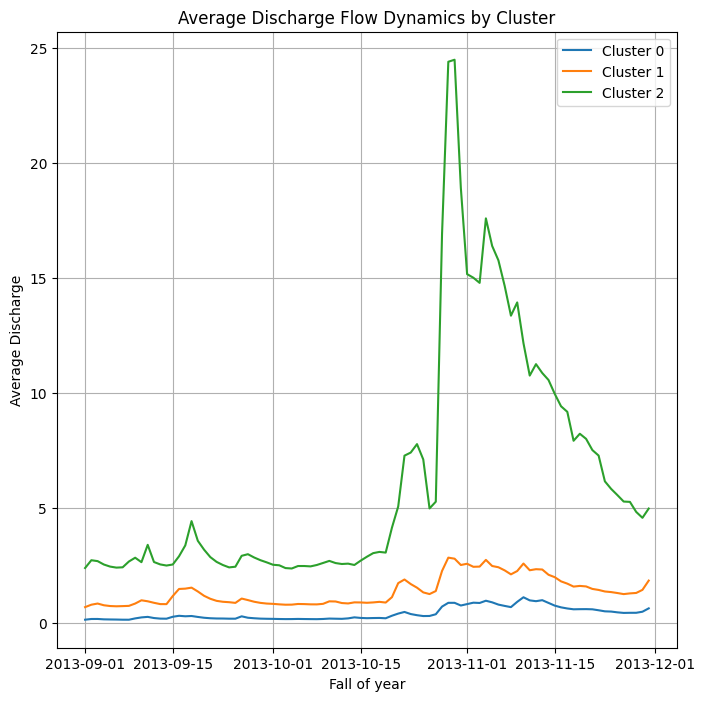

In [39]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Fall of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [41]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2013-09-01  0.598750  0.440540  0.147383  0.580998  0.327352  0.322254   
2013-09-02  0.625137  0.443261  0.172055  0.599211  0.347024  0.341621   
2013-09-03  0.656073  0.415104  0.160439  0.601029  0.325870  0.320796   
2013-09-04  0.635905  0.393460  0.161294  0.596390  0.310181  0.305351   
2013-09-05  0.618857  0.377742  0.156876  0.585250  0.308413  0.303611   
...              ...       ...       ...       ...       ...       ...   
2013-11-26  0.796163  0.475860  0.273634  0.706131  0.377804  0.371921   
2013-11-27  0.811244  0.479125  0.274413  0.717333  0.398051  0.391853   
2013-11-28  0.845618  0.495707  0.274675  0.733358  0.399063  0.392849   
2013-11-29  0.851667  0.548724  0.317571  0.776522  0.469276  0.461969   
2013-11-30  0.930999  0.700560  0.373947  0.916445  0.519676  0.511584   

            11000009  11000011  11000014  11000016  ...  64000025  66000014  \
2013-09-01  0.435774  0.320112  0.127593  0.445745  ...  0.007256  0.040551   
2013-09-02  0.439905  0.327688  0.131127  0.451132  ...  0.007365  0.041478   
2013-09-03  0.453021  0.334158  0.142347  0.468233  ...  0.015774  0.043411   
2013-09-04  0.439829  0.331270  0.131062  0.451033  ...  0.012198  0.042004   
2013-09-05  0.428388  0.328811  0.121275  0.436115  ...  0.010649  0.045320   
...              ...       ...       ...       ...  ...       ...       ...   
2013-11-26  1.004902  1.866923  0.614432  1.187791  ...  0.096529  0.951174   
2013-11-27  1.039750  1.807000  0.644241  1.233227  ...  0.099259  0.897894   
2013-11-28  1.053217  1.756494  0.655762  1.250787  ...  0.103951  0.885132   
2013-11-29  1.164576  1.730665  0.751019  1.395980  ...  0.120079  0.776515   
2013-11-30  1.467176  1.746750  1.009867  1.790519  ...  0.238135  0.928995   

            66000034  67000017  67000018   7000003   8000001   9000001  \
2013-09-01  0.130477  0.020968  0.013969  0.166588  0.254210  0.465451   
2013-09-02  0.139547  0.024065  0.021521  0.197736  0.268992  0.467635   
2013-09-03  0.133784  0.023709  0.022593  0.193394  0.281088  0.472628   
2013-09-04  0.126966  0.022535  0.011886  0.188631  0.277140  0.473472   
2013-09-05  0.124221  0.022999  0.010981  0.184801  0.277482  0.470770   
...              ...       ...       ...       ...       ...       ...   
2013-11-26  4.061447  1.182707  1.346116  0.591937  0.570510  1.473124   
2013-11-27  2.353080  1.050447  1.172939  0.624409  0.594862  1.484606   
2013-11-28  2.030934  1.085330  1.148464  0.666550  0.626464  1.456044   
2013-11-29  2.379962  0.983888  1.021912  0.675223  0.632968  1.641012   
2013-11-30  2.221327  1.572496  1.652808  0.787551  0.717205  1.846502   

             9000015  26000084  
2013-09-01  0.508295  0.088071  
2013-09-02  0.510293  0.120724  
2013-09-03  0.514857  0.137914  
2013-09-04  0.515629  0.147745  
2013-09-05  0.513158  0.151013  
...              ...       ...  
2013-11-26  1.429565  0.427604  
2013-11-27  1.440062  0.431125  
2013-11-28  1.413949  0.430738  
2013-11-29  1.583057  0.439317  
2013-11-30  1.770926  0.493098  

[91 rows x 267 columns]

<Axes: >

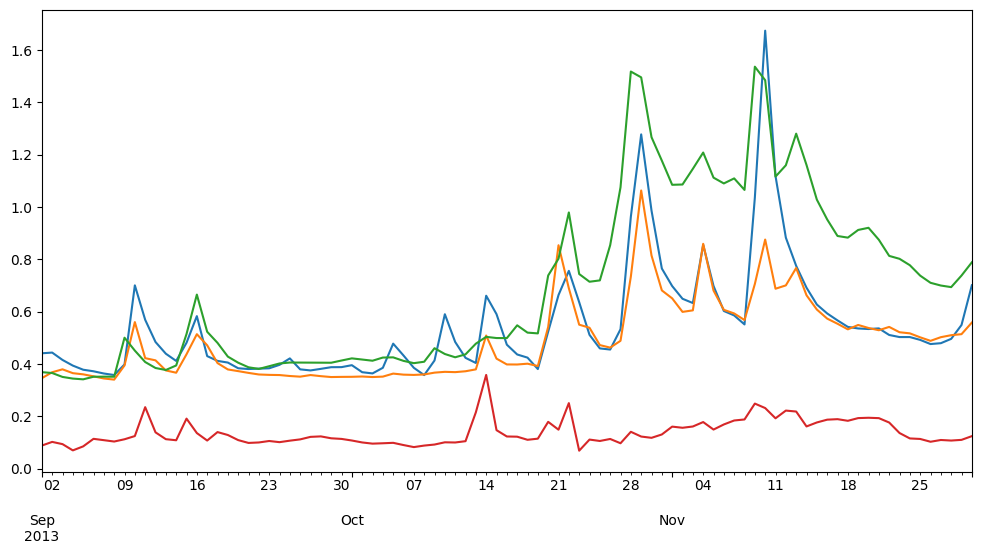

In [42]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

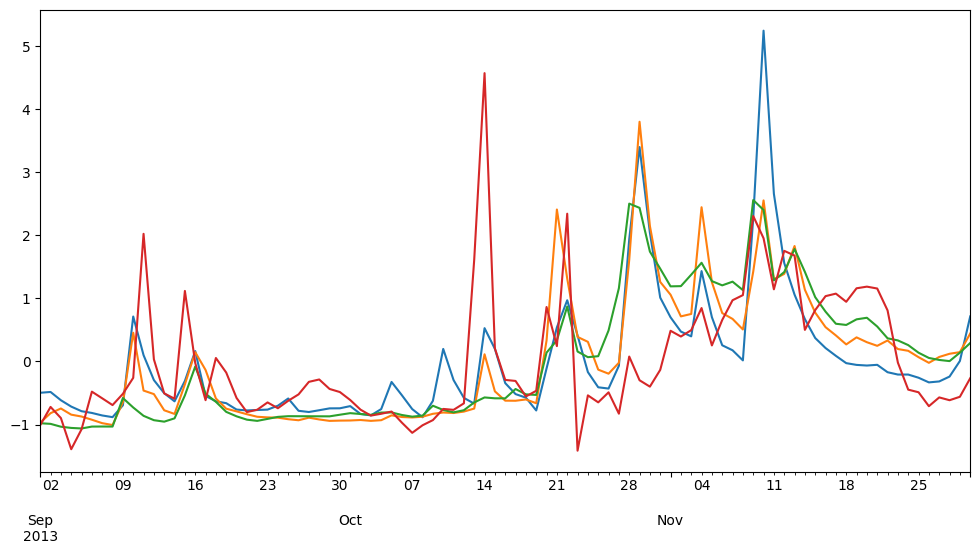

In [43]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

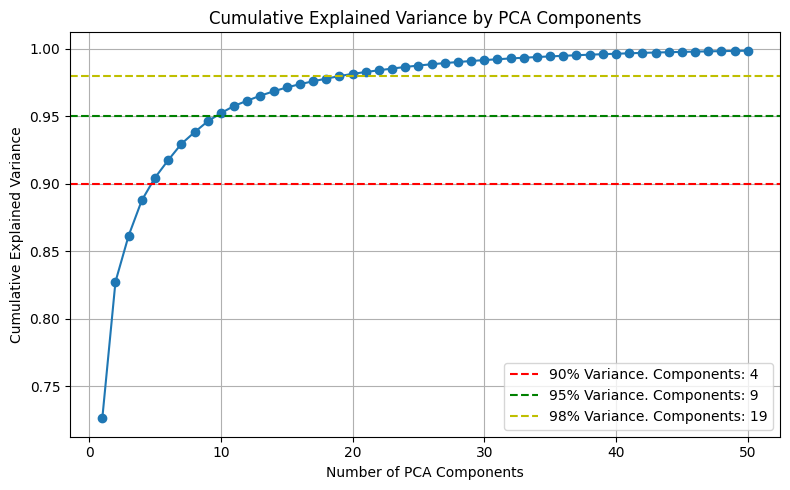

In [44]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-1.50614206e+01, -7.12864499e-02,  3.05924568e-01, ...,
         5.99843640e-01, -4.47354903e-01, -1.69224340e-01],
       [-1.24890678e+01, -1.05597297e+00,  1.52296686e+00, ...,
         7.52285474e-01,  2.47693113e-01, -2.03497023e-01],
       [-1.21478069e+01, -6.71097898e-01,  1.01951703e+00, ...,
         6.14394371e-01, -2.76457977e-05,  3.73779526e-01],
       ...,
       [ 2.07335931e+00,  5.93068335e+00, -5.56577796e-01, ...,
        -7.72784195e-01, -4.47437522e-01, -2.27250117e-01],
       [ 4.97373223e+00,  5.31302543e+00,  7.52723363e-01, ...,
        -3.58295274e-01,  2.48603222e-01,  4.05029862e-01],
       [ 1.27303922e+01,  4.91502836e+00,  1.99715626e+00, ...,
         8.05146494e-01,  9.88821849e-02, -7.36283248e-01]],
      shape=(91, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_26904\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


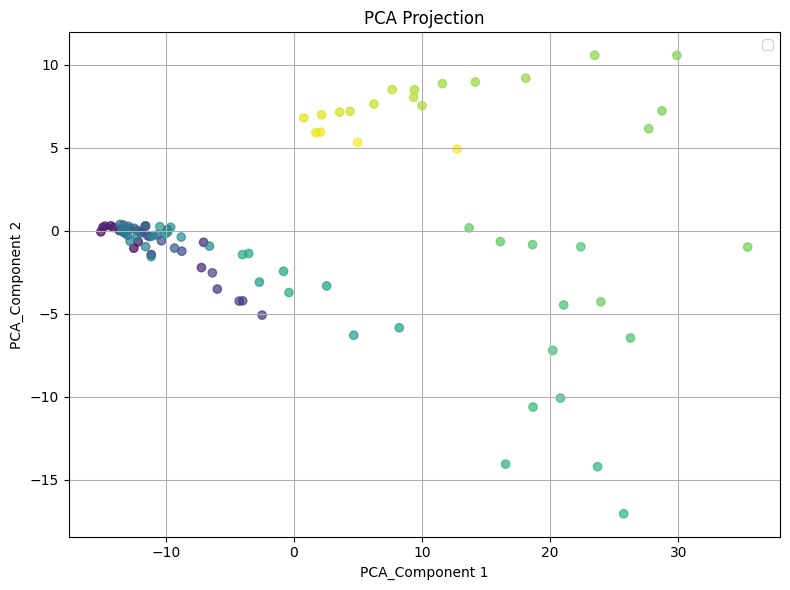

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_26904\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


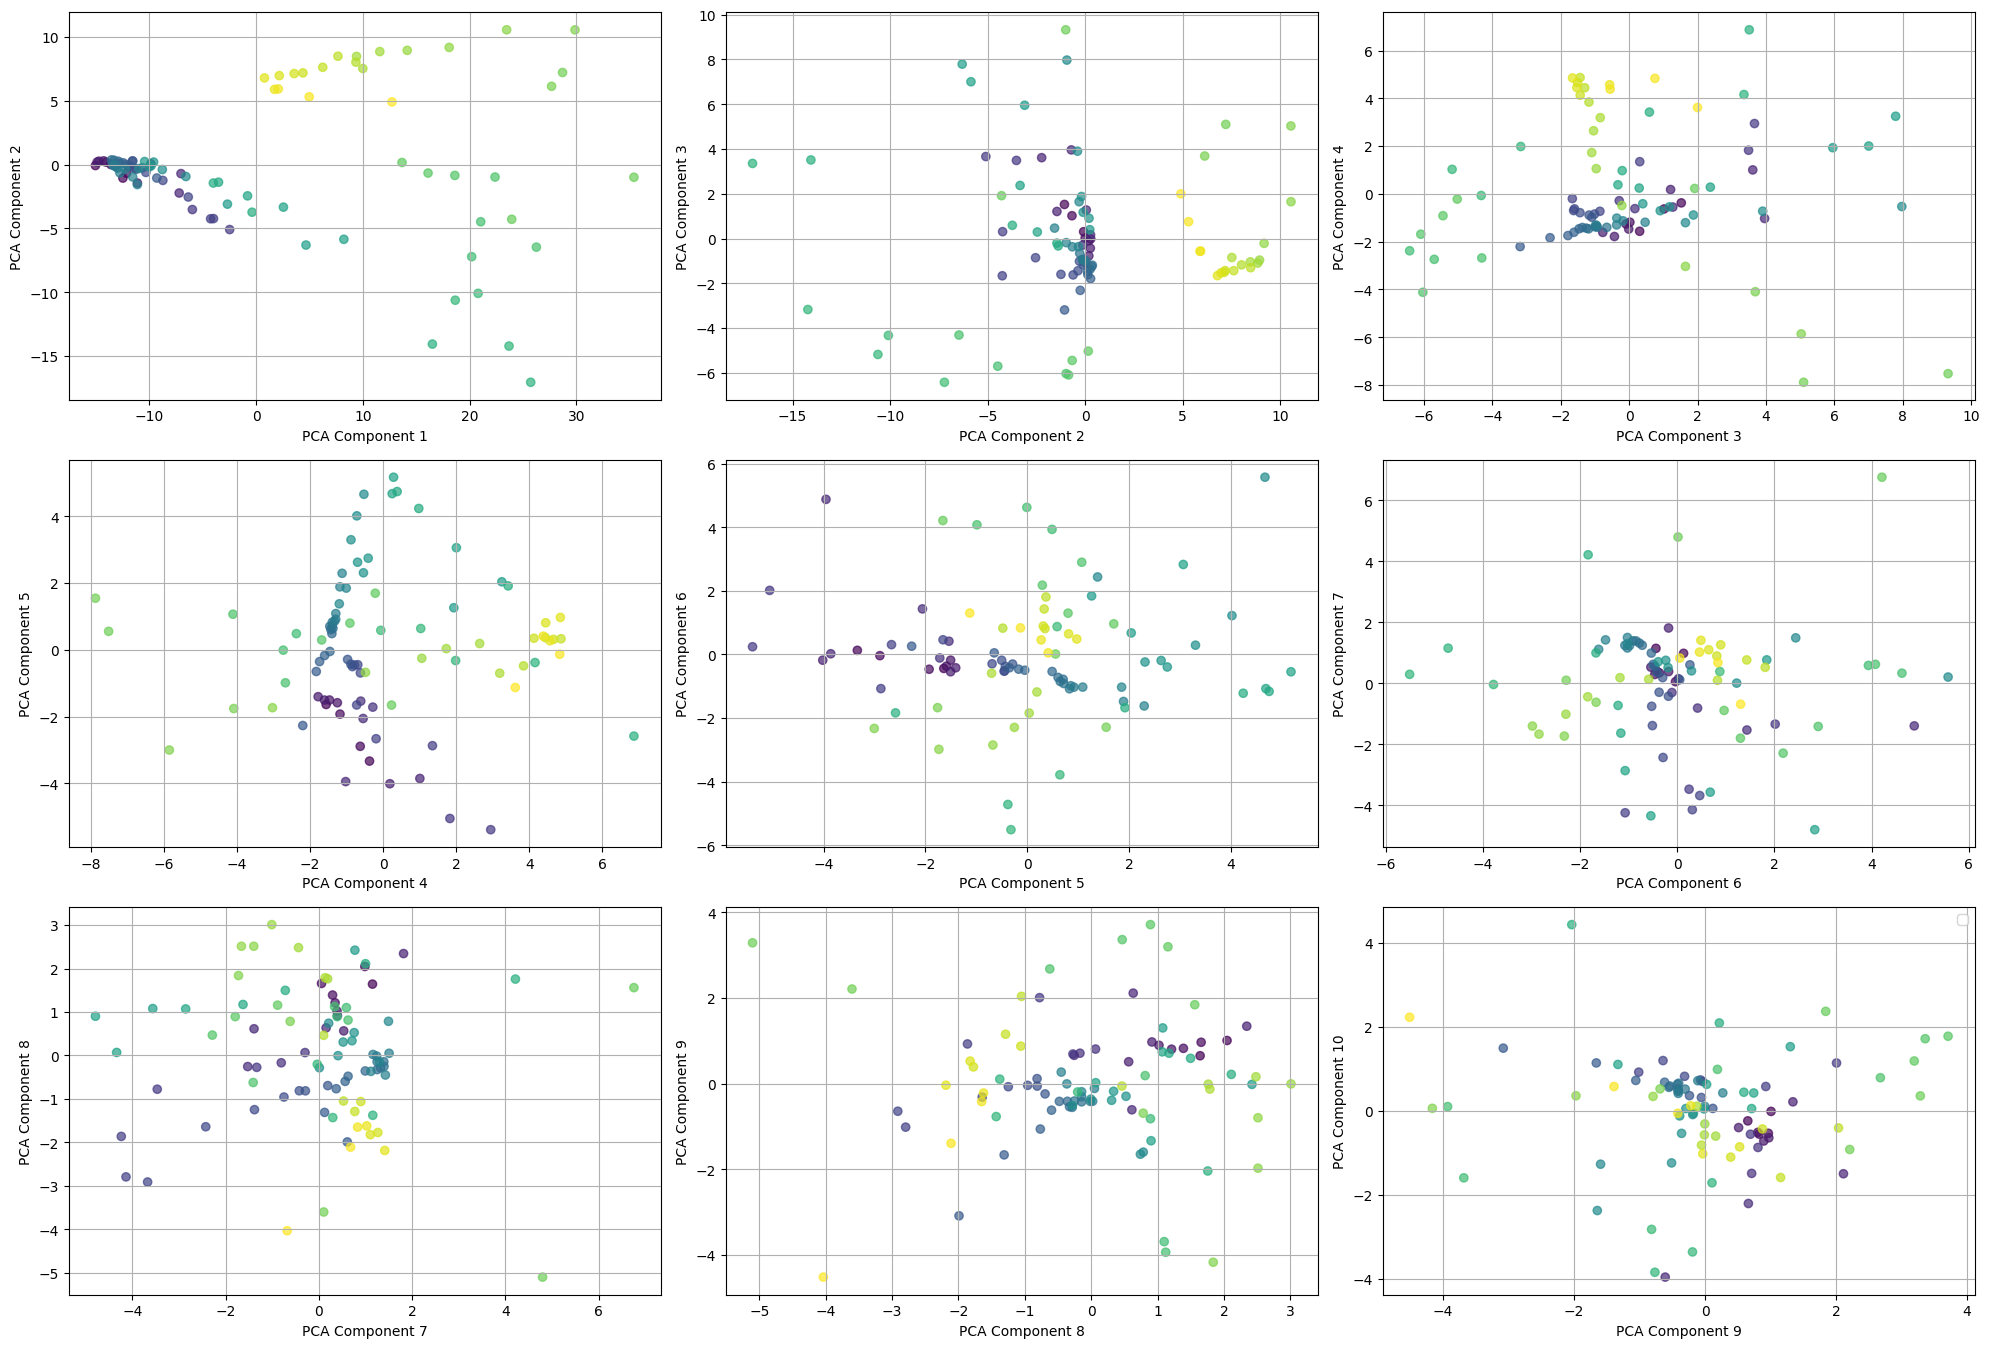

In [47]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [48]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.462
KMeans Davies-Bouldin Index is 1.003


<Axes: xlabel='k'>

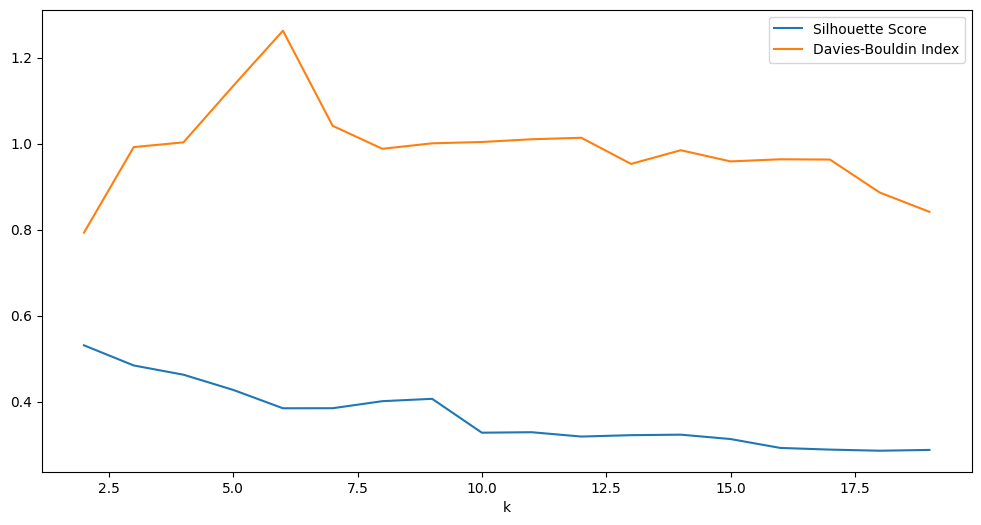

In [49]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         1     88               NaN   
1    0.76            3         2     83         -0.180375   
2    1.01            3         4     76         -0.114710   
3    1.27            3         3     71         -0.031052   
4    1.52            3         3     66          0.014793   
5    1.78            3         4     62          0.045372   
6    2.03            3         3     61          0.064917   
7    2.29            3         4     56         -0.024210   
8    2.54            3         4     54          0.004510   
9    2.80            3         4     51          0.020879   
10   3.05            3         5     46          0.021225   
11   3.31            3         5     43          0.071439   
12   3.56            3         6     38          0.112622   
13   3.82            3         6     34          0.099201   
14   4.07            3         5     31          0.201595   
15   4.33            3         5     31          0.201595   
16   4.58            3         5     30          0.200615   
17   4.84            3         5     27          0.255170   
18   5.09            3         4     26          0.250871   
19   5.35            3         4     26          0.250871   
20   5.60            3         4     26          0.250871   
21   5.86            3         4     25          0.248269   
22   6.11            3         4     23          0.271288   
23   6.37            3         4     22          0.279700   
24   6.62            3         4     21          0.286375   
25   6.88            3         4     21          0.286375   
26   7.13            3         4     19          0.295668   
27   7.39            3         3     19          0.397612   
28   7.64            3         3     17          0.422401   
29   7.90            3         4     11          0.433246   
30   8.15            3         4     10          0.439086   
31   8.41            3         4     10          0.439086   
32   8.66            3         4     10          0.439086   
33   8.92            3         4     10          0.439086   
34   9.17            3         4      8          0.450889   
35   9.43            3         3      7          0.479827   
36   9.68            3         3      4          0.470259   
37   9.94            3         3      3          0.476808   
38  10.19            3         3      3          0.476808   
39  10.45            3         3      3          0.476808   
40  10.70            3         3      3          0.476808   
41  10.96            3         3      3          0.476808   
42  11.21            3         3      3          0.476808   
43  11.47            3         3      3          0.476808   
44  11.72            3         2      3          0.449330   
45  11.98            3         2      3          0.449330   
46  12.23            3         1      3               NaN   
47  12.49            3         1      3               NaN   
48  12.74            3         1      3               NaN   
49  13.00            3         1      3               NaN   

    Davies-Bouldin Index  
0                    NaN  
1               1.050287  
2               1.021637  
3               0.979366  
4               0.997350  
5               0.936676  
6               0.924459  
7               1.198731  
8               1.165176  
9               1.138092  
10              1.264944  
11              1.263862  
12              1.257210  
13              1.459485  
14              1.530777  
15              1.530777  
16              1.532221  
17              1.540944  
18              1.595199  
19              1.595199  
20              1.595199  
21              1.591542  
22              1.557648  
23              1.528603  
24              1.493301  
25              1.493301  
26              1.471569  
27              1.588736  
28              1.407594  
29              1.617564  
30              1.613215  
31              1.613215  
32 

<Axes: xlabel='eps'>

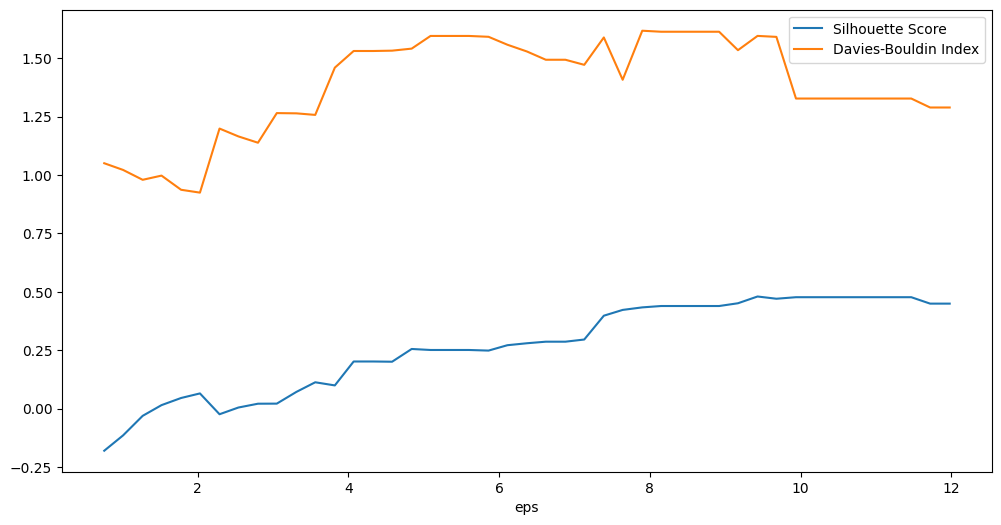

In [50]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

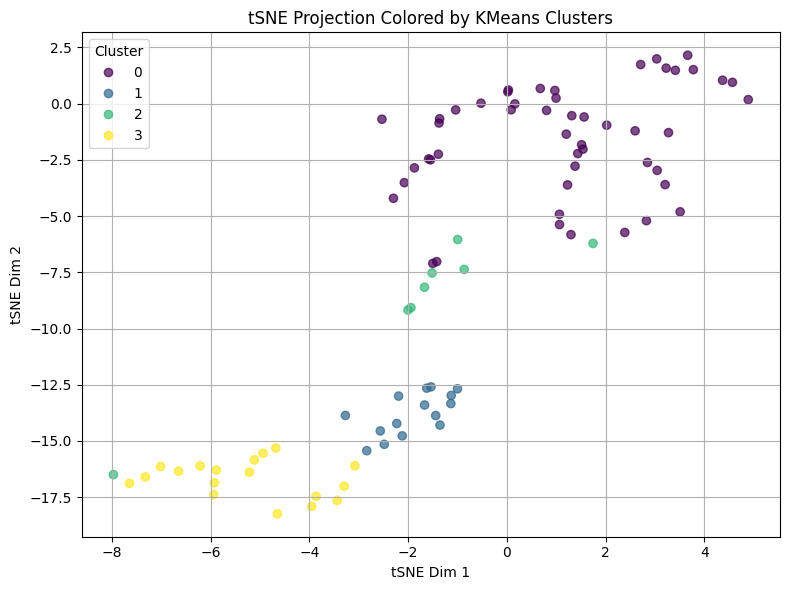

In [51]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         6    255          0.992904   
1    0.05            2         6    255          0.992904   
2    0.06            2         6    255          0.992904   
3    0.06            2         6    255          0.992904   
4    0.07            2         6    255          0.992904   
..    ...          ...       ...    ...               ...   
195  0.98            2        22     96          0.398707   
196  0.99            2        22     96          0.398707   
197  0.99            2        22     96          0.398707   
198  1.00            2        22     96          0.398707   
199  1.00            2        22     96          0.398707   

     Davies-Bouldin Index  
0                0.008989  
1                0.008989  
2                0.008989  
3                0.008989  
4                0.008989  
..                    ...  
195              0.464407  
196              0.464407  
197              0.464407  
198              0.464407  
199              0.464407  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

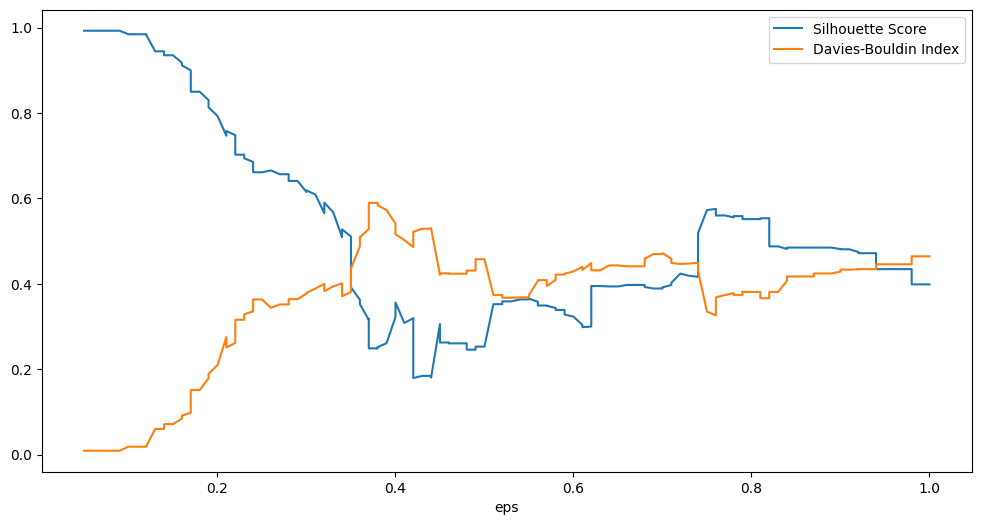

In [52]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Winter (4)

In [53]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [54]:
season = 4
season_year = 2013
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2013-12-01 to 2014-02-28
Columns: 242 entries, 10000009 to 9000015
dtypes: float64(242)
memory usage: 170.9 KB


None

            10000009  10000010  10000011  10000014  10000016  10000017  \
2013-12-01  0.884764  0.604833  0.351589  0.848448  0.478110  0.470665   
2013-12-02  0.832514  0.549753  0.330289  0.799857  0.451162  0.444137   
2013-12-03  0.808131  0.525813  0.331066  0.784607  0.453226  0.446169   
2013-12-04  0.829563  0.577678  0.365365  0.806616  0.504609  0.496752   
2013-12-05  0.940575  0.855239  0.850047  0.946661  0.627386  0.617616   
...              ...       ...       ...       ...       ...       ...   
2014-02-24  1.276001  0.936999  0.868456  1.036073  0.741539  0.729992   
2014-02-25  1.184423  0.884006  0.783993  0.983032  0.723793  0.712522   
2014-02-26  1.132158  0.858760  0.725745  0.952066  0.702560  0.691620   
2014-02-27  1.102291  0.841977  0.688002  0.930317  0.690950  0.680191   
2014-02-28  1.082743  0.831079  0.667563  0.911361  0.689331  0.678597   

            11000011  11000016  12000001  12000195  ...  63000007  64000025  \
2013-12-01  1.722611  1.587024  

          2013-12-01  2013-12-02  2013-12-03  2013-12-04  2013-12-05  \
10000009    0.044792    0.037428    0.107979    0.125407   -0.067371   
10000010   -0.371324   -0.374561   -0.356647   -0.291787   -0.180124   
10000011   -0.747770   -0.694325   -0.677153   -0.643438   -0.186983   
10000014   -0.009192   -0.010153    0.069264    0.087401   -0.059329   
10000016   -0.559697   -0.518210   -0.476107   -0.412810   -0.481183   
...              ...         ...         ...         ...         ...   
67000018    0.789238    0.439214    0.421818    0.346740    0.344613   
7000003    -0.160608   -0.199307   -0.162710   -0.039919   -0.041893   
8000001    -0.249949   -0.258983   -0.219258   -0.132489   -0.191775   
9000001     1.341166    1.198289    1.060503    1.177764    1.022055   
9000015     1.240248    1.115316    1.000981    1.106780    0.931421   

          2013-12-06  2013-12-07  2013-12-08  2013-12-09  2013-12-10  ...  \
10000009   -0.108439    0.016800   -0.285239   -0.364809  

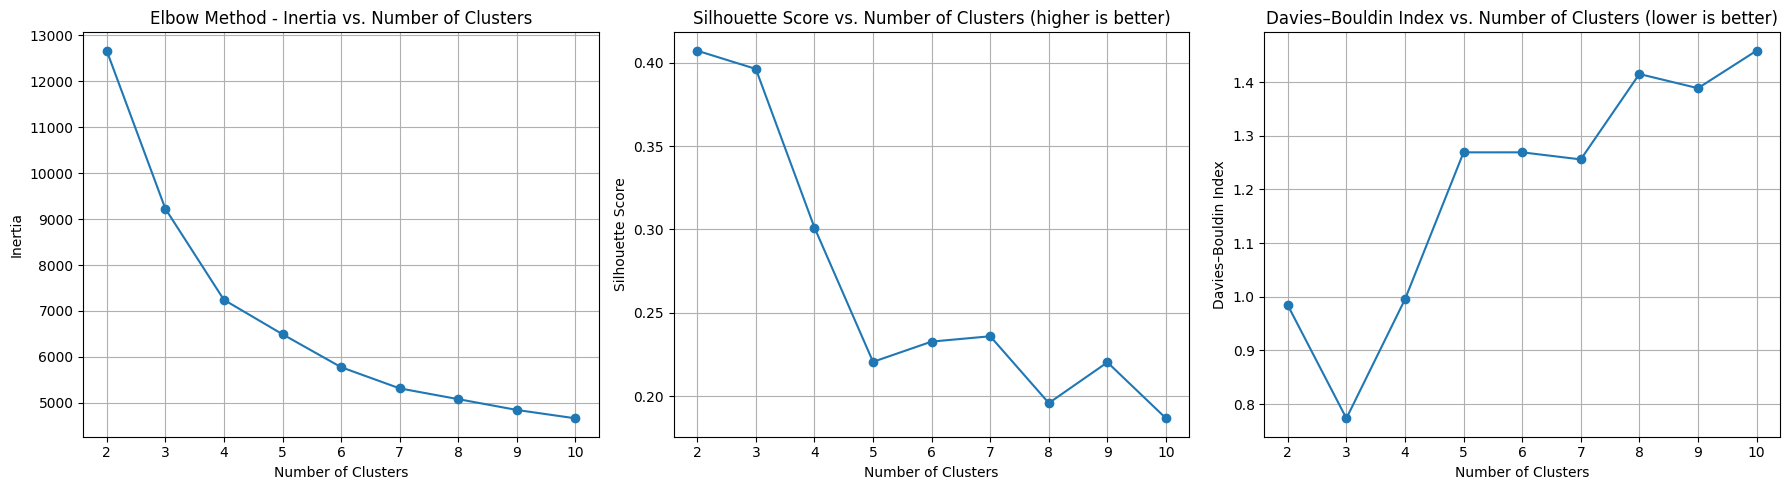

In [55]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        1
10000010        1
10000011        1
10000014        1
10000016        1

            10000009  10000010  10000011  10000014  10000016  10000017  \
2013-12-01  0.884764  0.604833  0.351589  0.848448  0.478110  0.470665   
2013-12-02  0.832514  0.549753  0.330289  0.799857  0.451162  0.444137   
2013-12-03  0.808131  0.525813  0.331066  0.784607  0.453226  0.446169   
2013-12-04  0.829563  0.577678  0.365365  0.806616  0.504609  0.496752   
2013-12-05  0.940575  0.855239  0.850047  0.946661  0.627386  0.617616   
...              ...       ...       ...       ...       ...       ...   
2014-02-24  1.276001  0.936999  0.868456  1.036073  0.741539  0.729992   
2014-02-25  1.184423  0.884006  0.783993  0.983032  0.723793  0.712522   
2014-02-26  1.132158  0.858760  0.725745  0.952066  0.702560  0.691620   
2014-02-27  1.102291  0.841977  0.688002  0.930317  0.690950  0.680191   
2014-02-28  1.082743  0.831079  0.667563  0.911361  0.689331  0.678597   

            11000011  11000016  12000001  12000195  ...  63000007  64000025  \
2013-12-01  1.722611  1.587024  

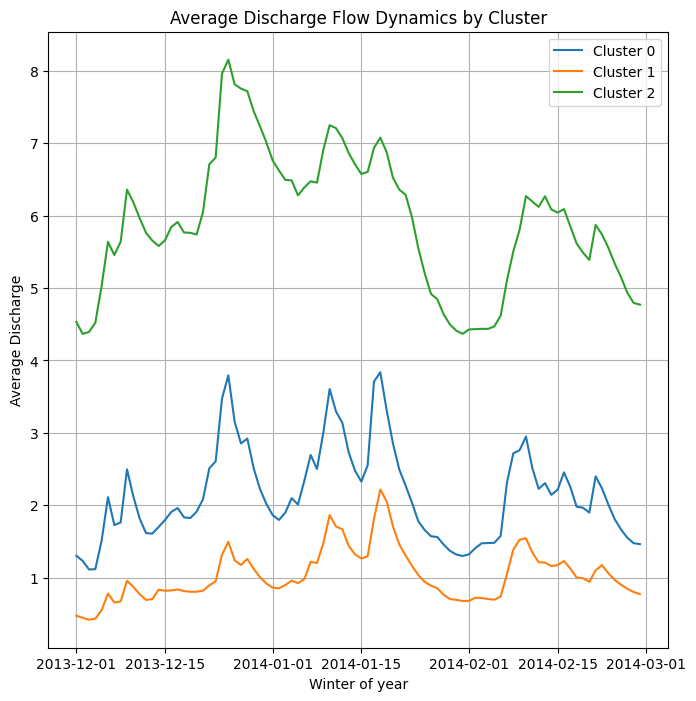

In [56]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Winter of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [58]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  10000017  \
2013-12-01  0.884764  0.604833  0.351589  0.848448  0.478110  0.470665   
2013-12-02  0.832514  0.549753  0.330289  0.799857  0.451162  0.444137   
2013-12-03  0.808131  0.525813  0.331066  0.784607  0.453226  0.446169   
2013-12-04  0.829563  0.577678  0.365365  0.806616  0.504609  0.496752   
2013-12-05  0.940575  0.855239  0.850047  0.946661  0.627386  0.617616   
...              ...       ...       ...       ...       ...       ...   
2014-02-24  1.276001  0.936999  0.868456  1.036073  0.741539  0.729992   
2014-02-25  1.184423  0.884006  0.783993  0.983032  0.723793  0.712522   
2014-02-26  1.132158  0.858760  0.725745  0.952066  0.702560  0.691620   
2014-02-27  1.102291  0.841977  0.688002  0.930317  0.690950  0.680191   
2014-02-28  1.082743  0.831079  0.667563  0.911361  0.689331  0.678597   

            11000011  11000016  12000001  12000195  ...  63000007  64000025  \
2013-12-01  1.722611  1.587024  0.637294  1.907455  ...  0.175319  0.172457   
2013-12-02  1.701090  1.407522  0.537026  1.510304  ...  0.166456  0.198534   
2013-12-03  1.653438  1.320777  0.500952  1.075637  ...  0.156929  0.152536   
2013-12-04  1.626167  1.364419  0.545658  1.566297  ...  0.156334  0.158944   
2013-12-05  1.595738  1.838532  0.711506  2.257308  ...  0.177851  0.183742   
...              ...       ...       ...       ...  ...       ...       ...   
2014-02-24  2.737230  2.438554  0.779331  2.067490  ...  0.589833  0.675913   
2014-02-25  2.738851  2.188110  0.722178  2.068362  ...  0.557339  0.625101   
2014-02-26  2.663679  1.996627  0.672964  1.726758  ...  0.500805  0.543040   
2014-02-27  2.574573  1.878529  0.649453  1.725148  ...  0.458435  0.488370   
2014-02-28  2.513377  1.863872  0.638062  1.391812  ...  0.451564  0.486488   

            66000014  66000034  67000017  67000018   7000003   8000001  \
2013-12-01  0.910721  2.215827  1.387951  1.385571  0.746587  0.686485   
2013-12-02  0.807406  3.901305  1.098131  1.108273  0.670036  0.629078   
2013-12-03  0.783247  2.745255  0.984843  0.998828  0.643654  0.609294   
2013-12-04  0.766790  2.072324  0.951850  0.963195  0.729746  0.673856   
2013-12-05  0.815705  1.580485  1.057395  1.252380  0.959857  0.846421   
...              ...       ...       ...       ...       ...       ...   
2014-02-24  1.144210  2.894756  1.122602  1.039079  1.750936  1.944675   
2014-02-25  1.039797  2.540571  1.032521  0.935962  1.546319  1.743797   
2014-02-26  0.939019  2.150335  0.939571  0.835101  1.402293  1.617359   
2014-02-27  0.862607  1.821034  0.873328  0.750002  1.304319  1.527342   
2014-02-28  0.832298  1.753736  0.850587  0.721767  1.227554  1.441387   

             9000001   9000015  
2013-12-01  1.756866  1.688976  
2013-12-02  1.629250  1.572303  
2013-12-03  1.386909  1.350742  
2013-12-04  1.464933  1.422076  
2013-12-05  1.765095  1.696500  
...              ...       ...  
2014-02-24  4.245227  3.963970  
2014-02-25  3.675009  3.442647  
2014-02-26  3.304904  3.104277  
2014-02-27  3.209759  3.017290  
2014-02-28  3.149678  2.962361  

[90 rows x 242 columns]

<Axes: >

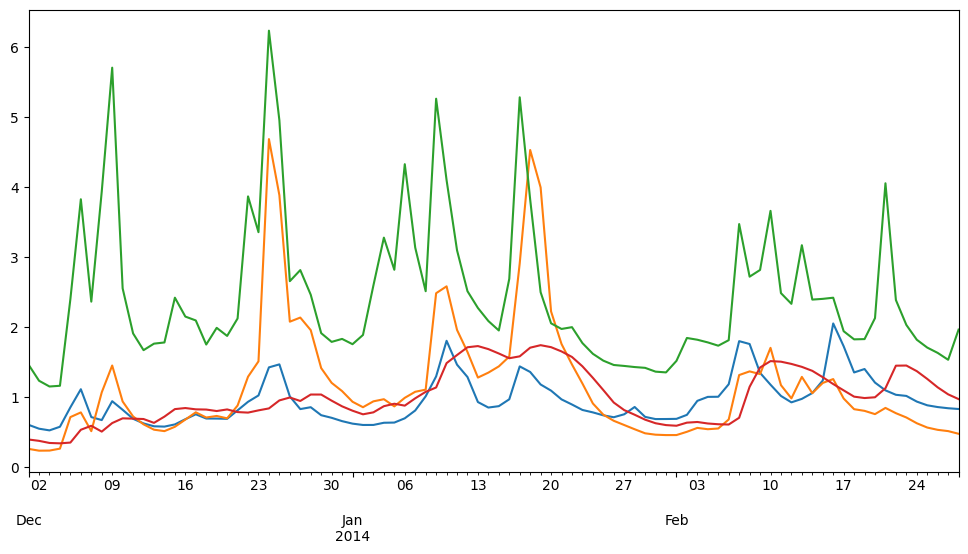

In [59]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

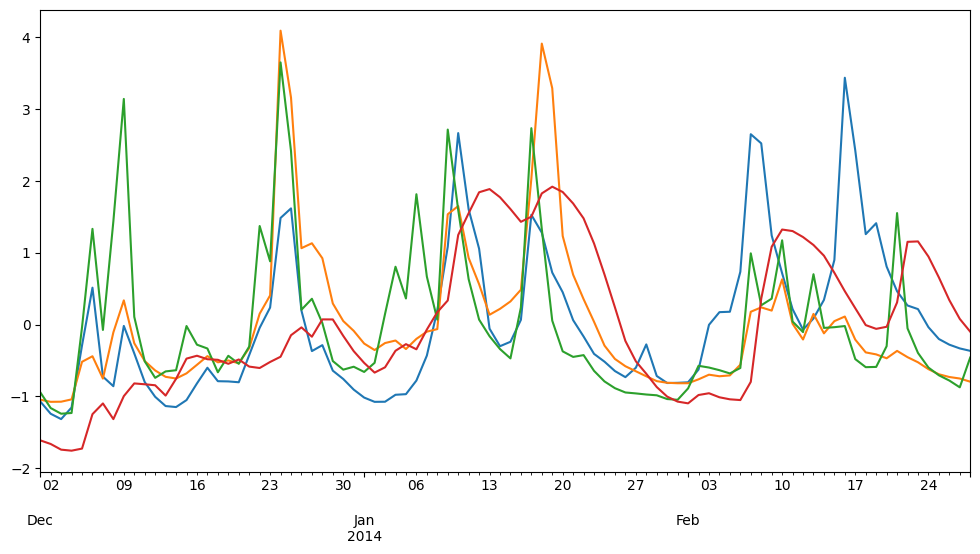

In [60]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

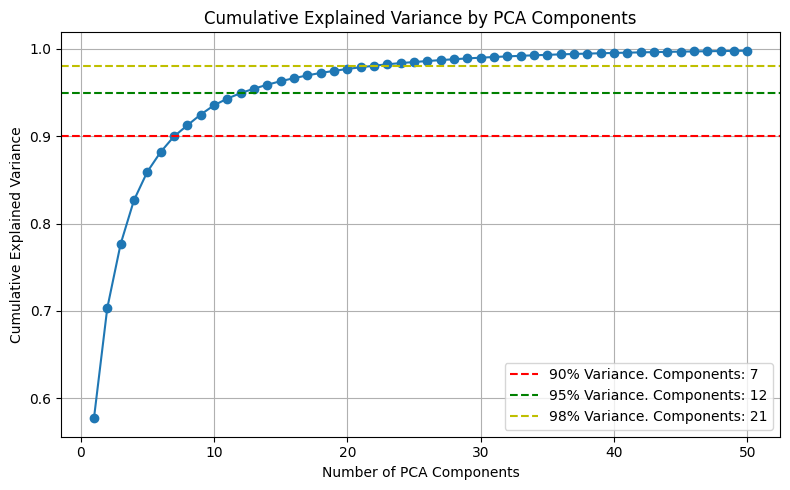

In [61]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [62]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-18.74729879,  -4.45754438,   0.22584709, ...,   0.6686468 ,
          0.05868959,   0.10869765],
       [-20.50821099,  -3.39966669,  -0.48291655, ...,   0.81965892,
          0.58419293,   0.91255938],
       [-21.64791432,  -3.39057439,  -0.49150073, ...,   0.23759287,
          0.23962196,   0.06790178],
       ...,
       [ -7.80676691,   6.10798804,   1.78327022, ...,  -0.18594858,
         -0.20011637,   0.57715423],
       [ -9.36656926,   5.83077315,   1.79043651, ...,  -0.34151978,
         -0.20792571,   0.86813787],
       [-10.09294497,   5.10107138,   1.96687895, ...,  -0.23899962,
         -0.33608531,   1.05832552]], shape=(90, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_26904\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


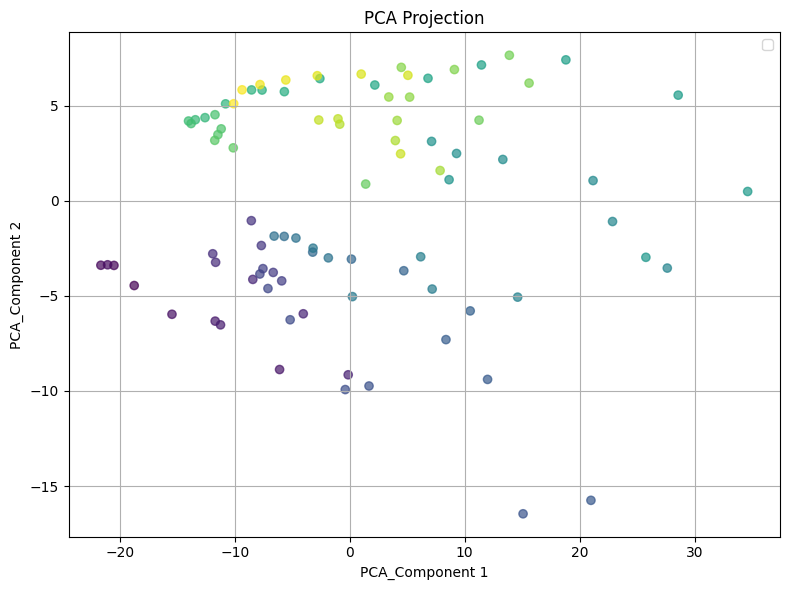

In [63]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_26904\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


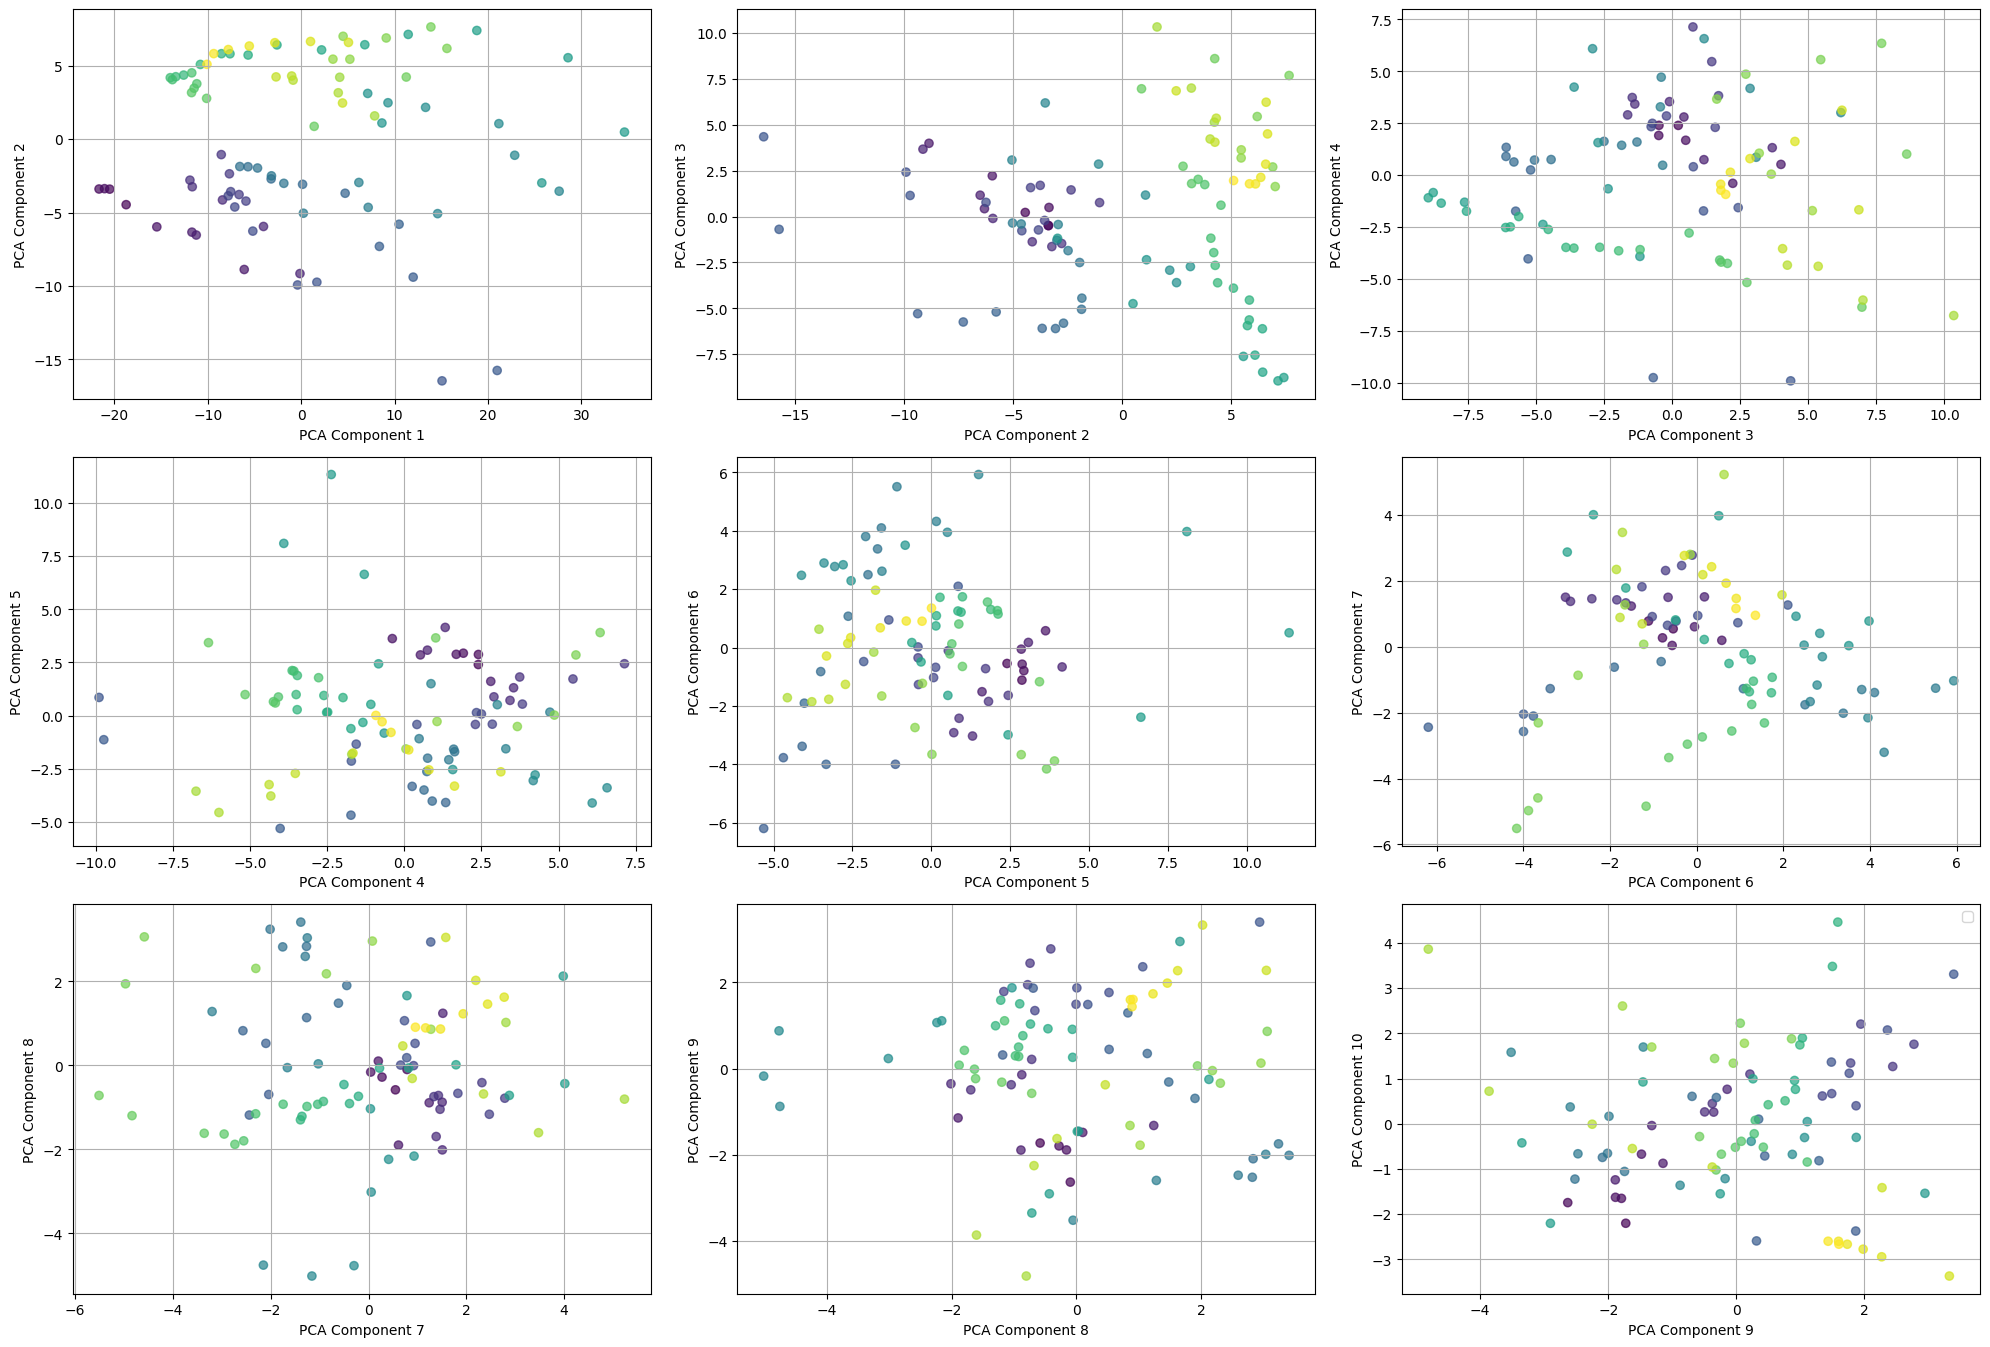

In [64]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [65]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.219
KMeans Davies-Bouldin Index is 1.439


<Axes: xlabel='k'>

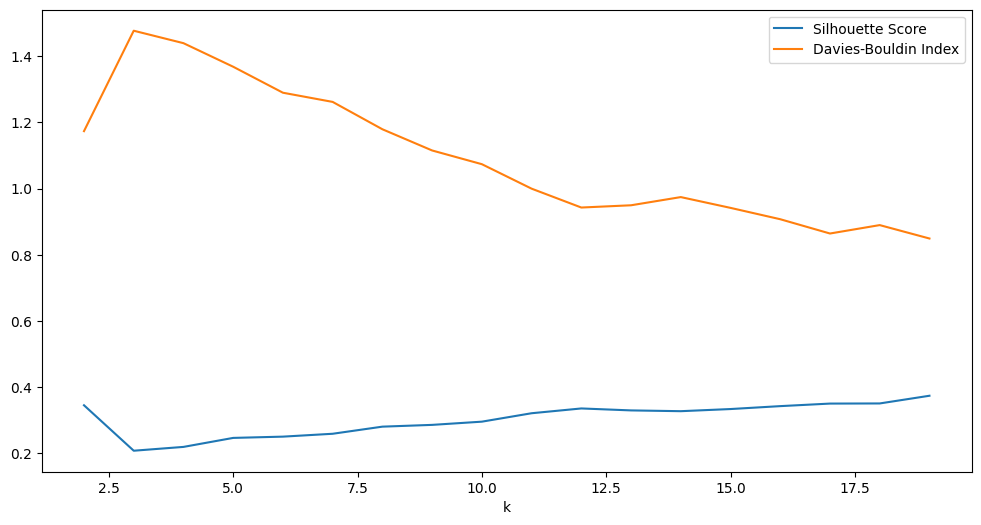

In [66]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     90               NaN   
1    0.76            3         0     90               NaN   
2    1.01            3         0     90               NaN   
3    1.27            3         0     90               NaN   
4    1.52            3         2     84         -0.048642   
5    1.78            3         2     84         -0.048642   
6    2.03            3         4     78         -0.134725   
7    2.29            3         4     77         -0.122015   
8    2.54            3         5     73         -0.058324   
9    2.80            3         5     72         -0.055024   
10   3.05            3         5     72         -0.055024   
11   3.31            3         6     64         -0.015609   
12   3.56            3         7     58          0.020855   
13   3.82            3         7     53          0.068800   
14   4.07            3         7     52          0.076496   
15   4.33            3         9     44          0.099920   
16   4.58            3         9     42          0.110884   
17   4.84            3        10     37          0.109591   
18   5.09            3        10     36          0.108309   
19   5.35            3         8     34          0.134044   
20   5.60            3         8     30          0.134374   
21   5.86            3         8     30          0.134374   
22   6.11            3         8     30          0.134374   
23   6.37            3         8     28          0.135411   
24   6.62            3         7     26          0.113961   
25   6.88            3         7     23          0.127246   
26   7.13            3         6     21          0.113718   
27   7.39            3         5     20          0.112387   
28   7.64            3         5     20          0.112387   
29   7.90            3         5     20          0.112387   
30   8.15            3         4     20          0.105730   
31   8.41            3         4     17          0.116528   
32   8.66            3         5     11          0.102286   
33   8.92            3         4     10          0.102652   
34   9.17            3         4      9          0.101599   
35   9.43            3         3      7          0.157562   
36   9.68            3         2      7          0.159647   
37   9.94            3         2      7          0.159647   
38  10.19            3         2      7          0.159647   
39  10.45            3         2      7          0.159647   
40  10.70            3         1      7               NaN   
41  10.96            3         1      7               NaN   
42  11.21            3         1      7               NaN   
43  11.47            3         1      5               NaN   
44  11.72            3         1      5               NaN   
45  11.98            3         1      5               NaN   
46  12.23            3         1      5               NaN   
47  12.49            3         1      3               NaN   
48  12.74            3         1      3               NaN   
49  13.00            3         1      3               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4               1.007756  
5               1.007756  
6               1.207620  
7               1.201064  
8               1.022971  
9               1.035601  
10              1.035601  
11              1.107897  
12              1.153895  
13              1.097448  
14              1.092065  
15              1.177823  
16              1.181279  
17              1.357022  
18              1.371719  
19              1.454720  
20              1.443525  
21              1.443525  
22              1.443525  
23              1.427014  
24              1.389164  
25              1.410085  
26              1.440706  
27              1.571176  
28              1.571176  
29              1.571176  
30              1.605100  
31              1.553011  
32 

<Axes: xlabel='eps'>

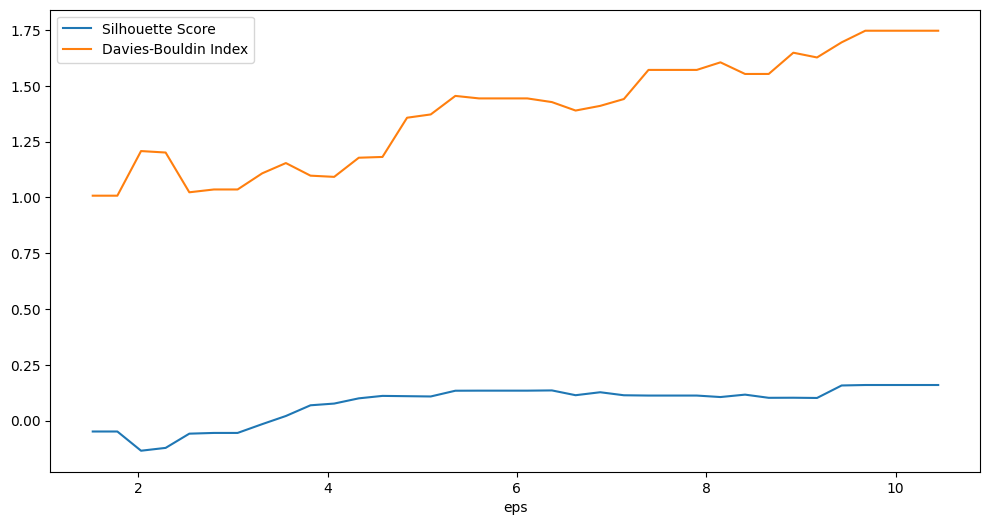

In [67]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

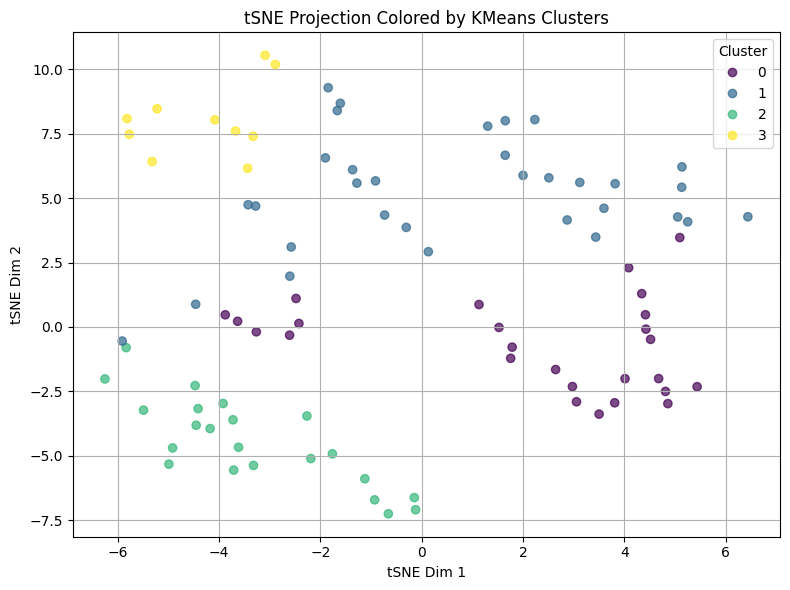

In [68]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         5    232          0.997870   
1    0.05            2         5    232          0.997870   
2    0.06            2         5    232          0.997870   
3    0.06            2         5    232          0.997870   
4    0.07            2         5    232          0.997870   
..    ...          ...       ...    ...               ...   
195  0.98            2        30    167          0.580960   
196  0.99            2        30    166          0.573682   
197  0.99            2        30    166          0.573682   
198  1.00            2        30    166          0.573682   
199  1.00            2        30    166          0.573682   

     Davies-Bouldin Index  
0                0.002229  
1                0.002229  
2                0.002229  
3                0.002229  
4                0.002229  
..                    ...  
195              0.478372  
196              0.484941  
197              0.484941  
198              0.484941  
199              0.484941  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

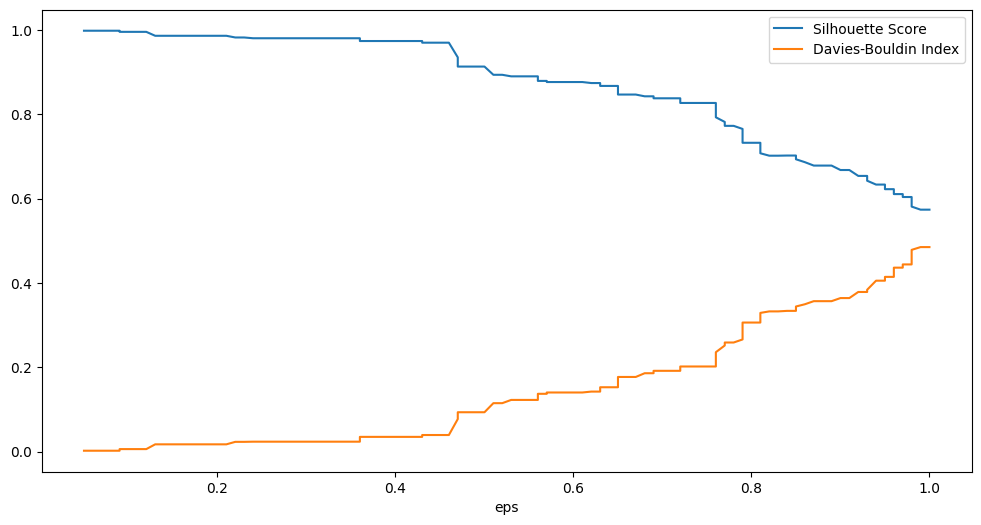

In [69]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))